In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import ROOT
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   

px = 1/plt.rcParams['figure.dpi']

Welcome to JupyROOT 6.26/04


In [2]:
import pandas as pd
import numpy as np
from hist.get_data import get_data, get_data_in_np

def b2helix(n):
    return sns.cubehelix_palette(n, start=1.5, rot=1.5, dark=0.3, light=.8, reverse=True)

def watermark(t=None,logo="Belle II", px=0.033, py=0.915, fontsize=16, alpha=0.8, alpha_logo=0.95, shift=0.15, bstyle='italic', *args, **kwargs):
       
    """

    Args:
        t:
        logo:
        px:
        py:
        fontsize:
        alpha:
        shift:
        *args:
        **kwargs:

    Returns:

    """
    if t is None:
        import datetime
        t = " %d (group)" % datetime.date.today().year

    plt.text(px, py, logo, ha='left',
             transform=plt.gca().transAxes,
             fontsize=fontsize,
             style=bstyle,
             alpha=alpha_logo,
             weight='bold',
             *args, **kwargs,
             # fontproperties=font,
             # bbox={'facecolor':'#377eb7', 'alpha':0.1, 'pad':10}
             )
    plt.text(px + shift, py, t, ha='left',
             transform=plt.gca().transAxes,
             fontsize=fontsize,
             #          style='italic',
             alpha=alpha,  *args, **kwargs
             #          fontproperties=font,
             # bbox={'facecolor':'#377eb7', 'alpha':0.1, 'pad':10}
             )    
# display iminuit version
import iminuit
print("iminuit version:", iminuit.__version__)

# everything in iminuit is done through the Minuit object, so we import it
from iminuit import Minuit,cost

# we also need a cost function to fit and import the LeastSquares function
from iminuit.cost import LeastSquares

from iminuit import Minuit
from iminuit.cost import UnbinnedNLL
from iminuit.util import describe

from numba_stats import norm, crystalball
from numba_stats import truncnorm, truncexpon, norm, expon

iminuit version: 2.15.2


# D2antiKstarpi0

## Signal MC

In [8]:
# file_loc = '/media/jykim/ssd_T5/storage/01_recon/pi0veto_calib/D2antiKstarpi0/ntuple/control_recon_mdst_1M.root'

In [9]:
file_loc = '/media/jykim/ssd_T5/storage/01_recon/pi0veto_calib/D2antiKstarpi0/ntuple/control_recon_mdst_5M.root'

In [10]:
base_filter = 'antiKstarpi0_rank_Dstp==1'
# base_filter = 'Pis_charge==1'
tree = 'control'

In [11]:
signal_variables = ['D0_M','antiKstar_InvM','Dstarp_Q','Dstarp_CMS_p','Dstarp_isSignal','antiKstarpi0_rank_Dstp','Pis_charge','D0_cosHel_0']


In [12]:
pd_D2antiKstar_1M = get_data(file=file_loc, tree=tree, base_filter=base_filter,variables=signal_variables )


In [13]:
pd_D2antiKstar_1M.describe()

,D0_M,antiKstar_InvM,Dstarp_Q,Dstarp_CMS_p,Dstarp_isSignal,antiKstarpi0_rank_Dstp,Pis_charge,D0_cosHel_0
count,821607.000000,821607.000000,821607.000000,821607.000000,723701.000000,821607.0,821607.0,821607.000000
mean,1.851468,0.901418,0.006703,3.213212,0.785704,1.0,1.0,-0.005984
std,0.062002,0.060504,0.003166,0.670858,0.410333,0.0,0.0,0.759787
min,1.665006,0.666222,-0.907222,2.038038,0.000000,1.0,1.0,-1.000000
25%,1.832757,0.875069,0.005598,2.649248,1.000000,1.0,1.0,-0.781576
50%,1.855755,0.896760,0.005923,3.145544,1.000000,1.0,1.0,-0.069641
75%,1.871887,0.922677,0.006441,3.716849,1.000000,1.0,1.0,0.777385
max,2.064999,1.327361,0.111084,6.020829,1.000000,1.0,1.0,1.000000


In [9]:
pd_D2antiKstar_1M['Dstarp_isSignal'].unique()

array([ 1.,  0., nan])

In [10]:
pd_D2antiKstar_1M[pd_D2antiKstar_1M['Dstarp_isSignal']==1]

,D0_M,antiKstar_InvM,Dstarp_Q,Dstarp_CMS_p,Dstarp_isSignal,antiKstarpi0_rank_Dstp,Pis_charge,D0_cosHel_0
0,1.859583,0.894297,0.005611,2.391074,1.0,1.0,1.0,-0.845462
2,1.868313,0.972184,0.005959,3.380317,1.0,1.0,1.0,-0.999118
3,1.815749,0.902817,0.005740,3.679179,1.0,1.0,1.0,0.917511
4,1.854300,0.862726,0.005547,4.436381,1.0,1.0,1.0,-0.983611
5,1.853220,0.909834,0.006054,2.660338,1.0,1.0,1.0,-0.666888
...,...,...,...,...,...,...,...,...
821601,1.856826,0.924833,0.005916,2.833103,1.0,1.0,1.0,0.882404
821602,1.852157,0.896883,0.006053,3.201658,1.0,1.0,1.0,0.870464
821603,1.867411,0.881624,0.005938,3.356793,1.0,1.0,1.0,0.718364
821604,1.868956,0.864324,0.005849,2.452566,1.0,1.0,1.0,0.949044


In [11]:
pd_D2antiKstar_1M[pd_D2antiKstar_1M['Dstarp_isSignal']==0]

,D0_M,antiKstar_InvM,Dstarp_Q,Dstarp_CMS_p,Dstarp_isSignal,antiKstarpi0_rank_Dstp,Pis_charge,D0_cosHel_0
1,1.696468,0.926929,0.016046,2.493974,0.0,1.0,1.0,-0.584998
10,1.856679,0.922124,0.003380,2.651428,0.0,1.0,1.0,0.753221
12,1.798087,0.996570,0.012411,2.333960,0.0,1.0,1.0,0.488713
15,1.857231,0.868527,0.006321,2.933783,0.0,1.0,1.0,0.875737
23,1.994878,0.903477,0.007371,2.798406,0.0,1.0,1.0,-0.902786
...,...,...,...,...,...,...,...,...
821557,1.766307,0.905968,0.010635,2.204953,0.0,1.0,1.0,-0.697286
821565,1.929590,0.843084,0.005836,2.535638,0.0,1.0,1.0,-0.766311
821582,1.871627,0.931436,0.004380,2.388622,0.0,1.0,1.0,0.288813
821594,2.003914,1.008690,0.005593,3.653128,0.0,1.0,1.0,-0.417149


In [298]:
pd_D2antiKstar_1M[(pd_D2antiKstar_1M['Dstarp_isSignal']!=0) & (pd_D2antiKstar_1M['Dstarp_isSignal']!=1) ]

,D0_M,antiKstar_InvM,Dstarp_Q,Dstarp_CMS_p,Dstarp_isSignal,antiKstarpi0_rank_Dstp,Pis_charge,D0_cosHel_0
9,1.862281,0.913625,0.002684,3.631810,NaN,1.0,1.0,0.986471
17,2.021691,1.055624,0.014322,4.039427,NaN,1.0,1.0,0.732609
19,1.693344,0.970344,0.015011,3.649561,NaN,1.0,1.0,-0.885626
30,2.048395,0.898065,0.005129,2.224664,NaN,1.0,1.0,0.746545
39,2.005083,0.915322,0.003420,3.671689,NaN,1.0,1.0,-0.638303
...,...,...,...,...,...,...,...,...
821562,2.031259,0.997066,0.015542,2.416499,NaN,1.0,1.0,0.262143
821566,1.800419,0.779305,0.012223,2.902663,NaN,1.0,1.0,0.963617
821573,1.919485,0.888403,0.007479,2.194476,NaN,1.0,1.0,0.808604
821587,1.963455,0.994876,0.006954,4.145985,NaN,1.0,1.0,0.874696


Text(0.5, 1.0, '1M signal MC')

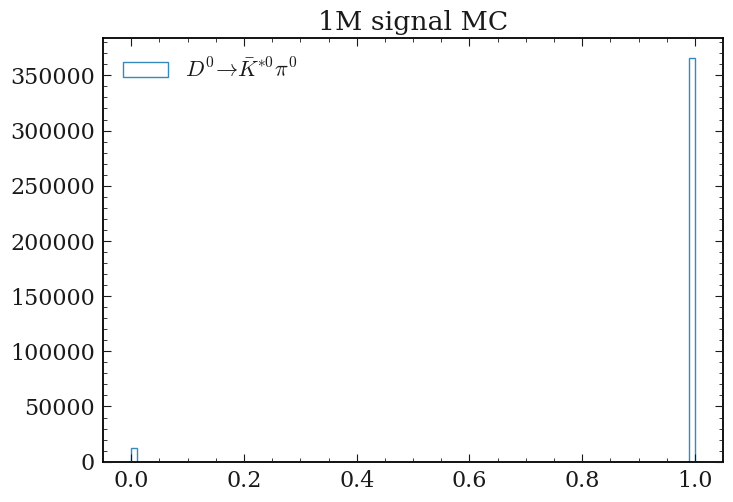

In [299]:
fig = plt.figure()
ax = fig.subplots()

# xrange = (1.665,2.065,51)
xm = np.linspace(*xrange)


df = pd_D2antiKstar_1M.query('abs(antiKstar_InvM - 0.89555)<0.06 & abs(Dstarp_Q - 0.00593)<0.0006 & Dstarp_CMS_p>2.3')
plt.hist(df["Dstarp_isSignal"],bins=100,histtype='step',label=r'$D^0 \to \bar{K}^{*0} \pi^0$');
# plt.hist(df[df['Dstarp_isSignal']<0.5]["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to \bar{K}^{*0} \pi^0$(false)');
# plt.hist(df[df['Dstarp_isSignal']==0.0]["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to \bar{K}^{*0} \pi^0$(false)');


plt.legend(loc="upper left")
# ax.set_title(r'$D^0 \to K^0_S \gamma$ in ' )
ax.set_title('1M signal MC')
# ax.set_xlim(1.665,2.065)

# n, xe = np.histogram(df["D0_M"], bins=50, range=(1.665,2.065))

# plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
# width = xe[1]-xe[0]
# plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.4f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');


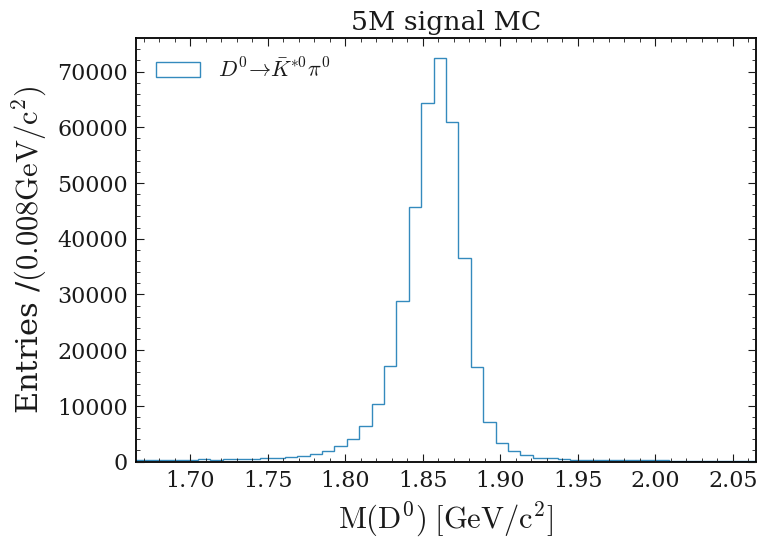

In [16]:
fig = plt.figure()
ax = fig.subplots()

xrange = (1.665,2.065,51)
xm = np.linspace(*xrange)


df = pd_D2antiKstar_1M.query('abs(antiKstar_InvM - 0.89555)<0.06 & abs(Dstarp_Q - 0.00593)<0.0006 & Dstarp_CMS_p>2.3')
plt.hist(df["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to \bar{K}^{*0} \pi^0$');
# plt.hist(df[df['Dstarp_isSignal']!=1]["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to \bar{K}^{*0} \pi^0$(false)');
# plt.hist(df[df['Dstarp_isSignal']==0.0]["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to \bar{K}^{*0} \pi^0$(false)');


plt.legend(loc="upper left")
# ax.set_title(r'$D^0 \to K^0_S \gamma$ in ' )
ax.set_title('5M signal MC')
ax.set_xlim(1.665,2.065)

n, xe = np.histogram(df["D0_M"], bins=50, range=(1.665,2.065))

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.4f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');


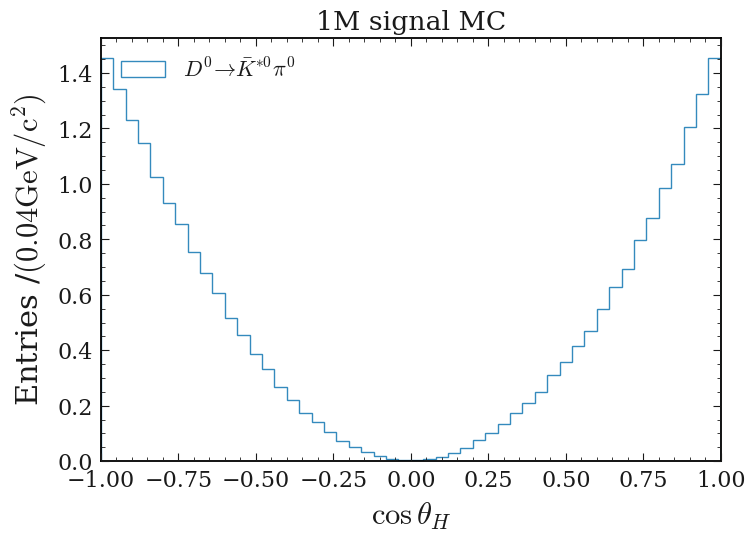

In [372]:
fig = plt.figure()
ax = fig.subplots()

xrange = (-1,1,51)
xm = np.linspace(*xrange)


df = pd_D2antiKstar_1M.query('abs(antiKstar_InvM - 0.89555)<0.06 & abs(Dstarp_Q - 0.00593)<0.0006 & Dstarp_CMS_p>2.3')
plt.hist(df["D0_cosHel_0"],bins=xm,histtype='step',label=r'$D^0 \to \bar{K}^{*0} \pi^0$',density=True);
# plt.hist(df[df['Dstarp_isSignal']<0.5]["D0_cosHel_0"],bins=xm,histtype='step',label=r'$D^0 \to \bar{K}^{*0} \pi^0$');
# plt.hist(df[df['Dstarp_isSignal']==1]["D0_cosHel_0"],bins=xm,histtype='step',label=r'$D^0 \to \bar{K}^{*0} \pi^0$',density=True);


plt.legend(loc="upper left")
# ax.set_title(r'$D^0 \to K^0_S \gamma$ in ' )
ax.set_title('1M signal MC')
ax.set_xlim(-1,1)

n, xe = np.histogram(df["D0_cosHel_0"], bins=50, range=(-1,1))

plt.xlabel(r'$\cos \theta_{H}$')
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.4f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');


iminuit version: 2.15.2


In [218]:
def signal_crystalball(x, s, alpha, n, CB_mu, CB_sigma):
    func = s * crystalball.pdf(x,alpha, n, CB_mu, CB_sigma)
    return s, func

In [219]:
dataset = df
dataset = dataset[(dataset['D0_M'] < 1.99) & (dataset['D0_M'] > 1.73)  ]['D0_M']

In [34]:
PDF = signal_crystalball

In [35]:
COST = cost.ExtendedUnbinnedNLL(dataset, PDF)
m = Minuit(COST, s=73000 ,alpha=0.51, n=30, CB_mu=1.86,CB_sigma=0.02)

In [36]:
m.limits["n"]=(0,None)

m.limits["alpha"]=(0,None)
m.limits["CB_sigma"]=(0, 0.5)

# m.limits["CB_mu"]=(1.78,1.90)

m.limits["s"]=(0,None)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.113e+07                 │              Nfcn = 329              │
│ EDM = 5.86e+04 (Goal: 0.0002)    │            time = 1.7 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s        │  391.5e3  │   0.6e3   │            │            │    0    │         │       │
│ 1 │ alpha    │   1.16    │   0.04    │            │            │    0    │         │       │
│ 2 │ n        │    20     │    10     │            │            │    0    │         │       │
│ 3 │ CB_mu    │  1.85931  │  0.00006  │            │            │         │         │       │
│ 4 │ CB_sigma │ 19.374e-3 │ 0.028e-3  │            │            │    0    │   0.5   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────────────────────────────────┐
│          │         s     alpha         n     CB_mu  CB_sigma │
├──────────┼───────────────────────────────────────────────────┤
│        s │  3.13e+05    0.0917     -21.5 -9.23e-05 -9.78e-06 │
│    alpha │    0.0917     0.002    -0.464  -2.1e-06  -6.3e-08 │
│        n │     -21.5    -0.464       108  0.000479  2.73e-05 │
│    CB_mu │ -9.23e-05  -2.1e-06  0.000479  3.46e-09 -2.04e-10 │
│ CB_sigma │ -9.78e-06  -6.3e-08  2.73e-05 -2.04e-10  7.96e-10 │
└──────────┴───────────────────────────────────────────────────┘

In [37]:
m.minos()

RuntimeError: Function minimum is not valid: <FMin algorithm='Migrad' edm=58554.37086642396 edm_goal=0.0002 errordef=1.0 fval=-11133820.254873808 has_accurate_covar=True has_covariance=True has_made_posdef_covar=False has_parameters_at_limit=False has_posdef_covar=True has_reached_call_limit=False has_valid_parameters=False hesse_failed=False is_above_max_edm=True is_valid=False nfcn=329 ngrad=0 reduced_chi2=nan time=1.7379678409997723>

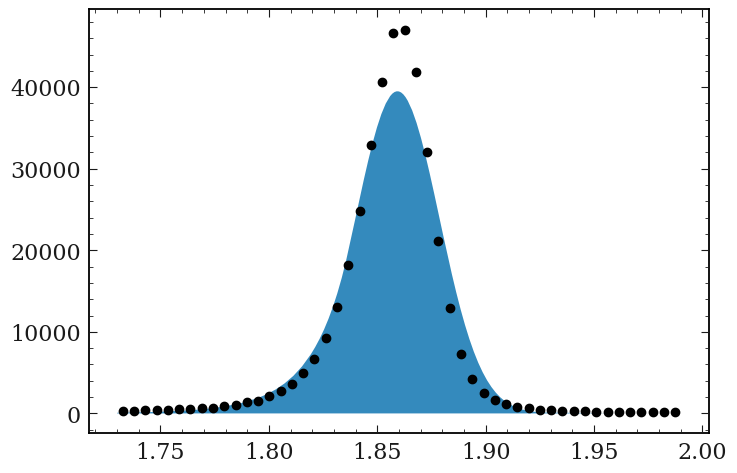

In [38]:
COST.visualize(m.values)

In [39]:
m.interactive()

true entries = 391044


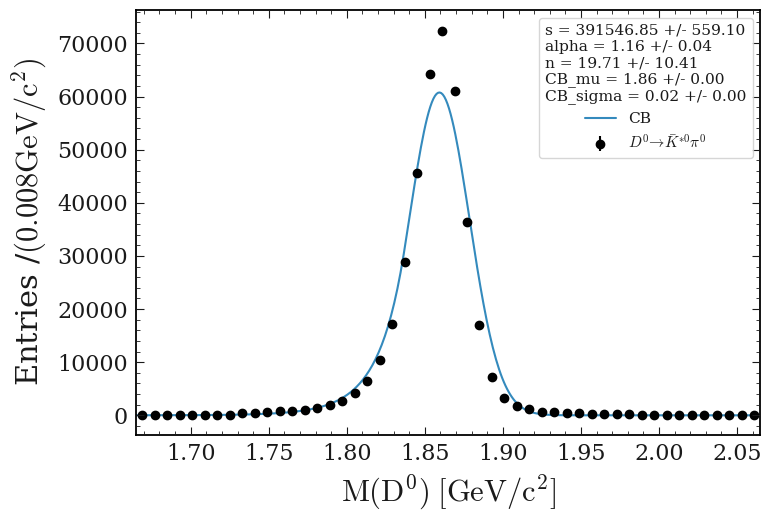

In [40]:
n, xe = np.histogram(dataset, bins=50, range=(1.665,2.065))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


# import b2plot as bp
# plt.style.use('belle2')
xrange = (1.665,2.065,400)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label=r"$D^0 \to \bar{K}^{*0} \pi^0$")

# plt.hist(dataset,density=True)

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

# plt.plot(xm, crystalball_pdf(xm, alpha=1.006, n=9.2, CB_mu=1.86272, CB_sigma=0.01294) * len(dataset) * dx[0],label="fixed(CB)")


# plt.plot(xm, crystalball.pdf(xm, *m.values) * len(dataset) * dx[0],label="fit(CB)")


plt.plot(xm, signal_crystalball(xm, *m.values)[1] * dx[0] ,label="CB")


# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'x-small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='x-small')

ax = plt.gca()
# ax.set_ylim(1e-1,1e5)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
# plt.savefig(this_plot_location)

# plt.yscale("log")

print("true entries = " + str(len(dataset)))
# print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

In [64]:
def same_mu_extended_gauss_crystalball(x, s1, s2, alpha, n, CB_sigma, mu, sigma):
    func = s1 * crystalball.pdf(x, alpha, n, mu, CB_sigma) + s2 * norm.pdf(x, mu, sigma)
#     return func
    s = s1 + s2
    return s, func

In [65]:
dataset = df
dataset = dataset[(dataset['D0_M'] < 1.93) & (dataset['D0_M'] > 1.73)  ]['D0_M']

In [66]:
PDF = same_mu_extended_gauss_crystalball

In [67]:
COST = cost.ExtendedUnbinnedNLL(dataset, PDF)
m = Minuit(COST,  s1=300000,s2=90000, alpha=1, n=30, CB_sigma=0.05, mu=1.86, sigma=0.05)

In [68]:
m.limits["s1"]=(0,None)
m.limits["s2"]=(0,None)
m.limits["n"]=(0,None)

m.limits["alpha"]=(0,None)
m.limits["CB_sigma","sigma"]=(0, 0.1)
# m.limits["loc","mu"]=(1.84, 1.88)
m.limits["mu"]=(1.80,1.90)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.113e+07                 │              Nfcn = 380              │
│ EDM = 1.72e-05 (Goal: 0.0002)    │            time = 3.5 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1       │  305.4e3  │   2.7e3   │            │            │    0    │         │       │
│ 1 │ s2       │  83.1e3   │   2.7e3   │            │            │    0    │         │       │
│ 2 │ alpha    │   0.873   │   0.012   │            │            │    0    │         │       │
│ 3 │ n        │   8.29    │   0.23    │            │            │    0    │         │       │
│ 4 │ CB_sigma │ 13.04e-3  │  0.09e-3  │            │            │    0    │   0.1   │       │
│ 5 │ mu       │  1.86009  │  0.00006  │            │            │   1.8   │   1.9   │       │
│ 6 │ sigma    │ 25.17e-3  │  0.24e-3  │            │            │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────────────────────────────────────────────────────┐
│          │        s1        s2     alpha         n  CB_sigma        mu     sigma │
├──────────┼───────────────────────────────────────────────────────────────────────┤
│       s1 │  7.35e+06 -7.07e+06      23.4      -139     0.206    -0.078     0.572 │
│       s2 │ -7.07e+06  7.17e+06     -23.3       133    -0.206    0.0779    -0.572 │
│    alpha │      23.4     -23.3  0.000142  -0.00196  9.43e-07 -5.65e-07  2.17e-06 │
│        n │      -139       133  -0.00196    0.0531 -7.54e-06  7.18e-06 -1.76e-05 │
│ CB_sigma │     0.206    -0.206  9.43e-07 -7.54e-06   8.2e-09 -3.85e-09  1.69e-08 │
│       mu │    -0.078    0.0779 -5.65e-07  7.18e-06 -3.85e-09  3.32e-09 -7.76e-09 │
│    sigma │     0.572    -0.572  2.17e-06 -1.76e-05  1.69e-08 -7.76e-09  5.61e-08 │
└──────────┴───────────────────────────────────────────────────────────────────────┘

In [69]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.113e+07                 │             Nfcn = 2351              │
│ EDM = 1.72e-05 (Goal: 0.0002)    │           time = 14.6 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1       │  305.4e3  │   2.7e3   │   -2.8e3   │   2.7e3    │    0    │         │       │
│ 1 │ s2       │  83.1e3   │   2.7e3   │   -2.6e3   │   2.7e3    │    0    │         │       │
│ 2 │ alpha    │   0.873   │   0.012   │   -0.012   │   0.012    │    0    │         │       │
│ 3 │ n        │   8.29    │   0.23    │   -0.24    │    0.23    │    0    │         │       │
│ 4 │ CB_sigma │ 13.04e-3  │  0.09e-3  │  -0.09e-3  │  0.09e-3   │    0    │   0.1   │       │
│ 5 │ mu       │  1.86009  │  0.00006  │  -0.00006  │  0.00006   │   1.8   │   1.9   │       │
│ 6 │ sigma    │ 25.17e-3  │  0.24e-3  │  -0.24e-3  │  0.24e-3   │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │          s1           │          s2           │         alpha         │           n           │       CB_sigma        │          mu           │         sigma         │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -2.8e3   │   2.7e3   │  -2.6e3   │   2.7e3   │  -0.012   │   0.012   │   -0.24   │   0.23    │ -0.09e-3  │  0.09e-3  │ -0.06e-3  │  0.06e-3  │ -0.24e-3  │  0.24e-3  │
│  Valid   │   True    │   False   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   False   │   False   │   True    │   False   │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌──────────┬───────────────────────────────────────────────────────────────────────┐
│          │        s1        s2     alpha         n  CB_sigma        mu     sigma │
├──────────┼───────────────────────────────────────────────────────────────────────┤
│       s1 │  7.35e+06 -7.07e+06      23.4      -139     0.206    -0.078     0.572 │
│       s2 │ -7.07e+06  7.17e+06     -23.3       133    -0.206    0.0779  

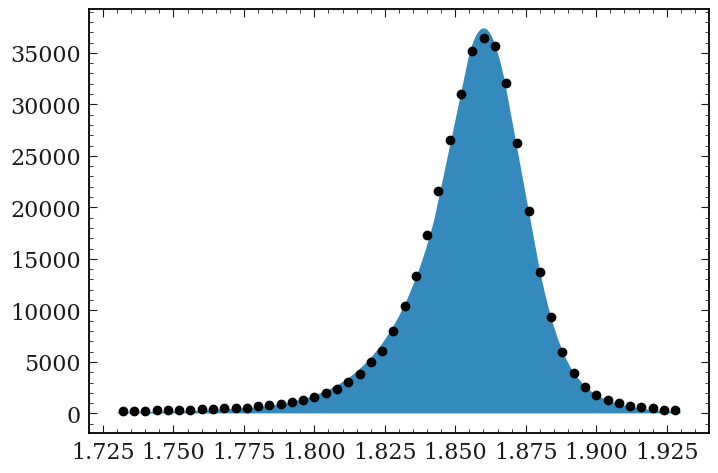

In [70]:
COST.visualize(m.values)

true entries = 388537


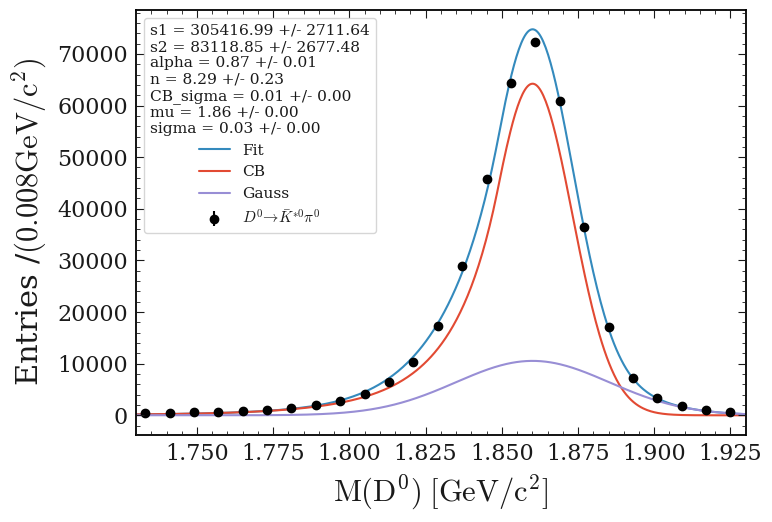

In [71]:
n, xe = np.histogram(dataset, bins=50, range=(1.665,2.065))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


# import b2plot as bp
# plt.style.use('belle2')
xrange = (1.665,2.065,1000)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label=r"$D^0 \to \bar{K}^{*0} \pi^0$")

# plt.hist(dataset,density=True)

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

# plt.plot(xm, crystalball_pdf(xm, alpha=1.006, n=9.2, CB_mu=1.86272, CB_sigma=0.01294) * len(dataset) * dx[0],label="fixed(CB)")


# plt.plot(xm, crystalball.pdf(xm, *m.values) * len(dataset) * dx[0],label="fit(CB)")


plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0] ,label="Fit")
# alpha, n, mu, CB_sigma
plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['alpha'], m.values['n'], m.values['mu'], m.values['CB_sigma']) * dx[0],label="CB")

plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")




# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'x-small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='x-small')

ax = plt.gca()
# ax.set_ylim(1e-1,1e5)
# ax.set_xlim(1.665,2.065)
ax.set_xlim(1.73,1.93)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
# plt.savefig(this_plot_location)

# plt.yscale("log")

print("true entries = " + str(len(dataset)))
# print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

In [67]:
388537/5000000

0.0777074

In [55]:
def same_mu_extended_2gauss_crystalball(x, s1, s2,s3, alpha, n, CB_sigma, mu, sigma, sigma2):
    func = s1 * crystalball.pdf(x, alpha, n, mu, CB_sigma) + s2 * norm.pdf(x, mu, sigma) + s3 * norm.pdf(x, mu, sigma2)
#     return func
    s = s1 + s2 + s3
    return s, func

In [56]:
dataset = df
dataset = dataset[(dataset['D0_M'] < 1.93) & (dataset['D0_M'] > 1.73)  ]['D0_M']

# dataset = dataset[(dataset['D0_M'] < 1.89) & (dataset['D0_M'] > 1.83)  ]['D0_M']

In [57]:
PDF = same_mu_extended_2gauss_crystalball

In [58]:
COST = cost.ExtendedUnbinnedNLL(dataset, PDF)
m = Minuit(COST,  s1=35000,s2=30000, s3= 2000, alpha=1, n=30, CB_sigma=0.05, mu=1.86, sigma=0.05,sigma2=0.05)

In [59]:
m.limits["s1"]=(0,None)
m.limits["s2"]=(0,None)
m.limits["s3"]=(0,None)
m.limits["n"]=(0,None)

m.limits["alpha"]=(0,None)
m.limits["CB_sigma","sigma","sigma2"]=(0, 0.2)
# m.limits["loc","mu"]=(1.84, 1.88)
m.limits["mu"]=(1.80,1.90)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.113e+07                 │             Nfcn = 1045              │
│ EDM = 17.5 (Goal: 0.0002)        │           time = 12.4 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1       │  157.8e3  │   2.4e3   │            │            │    0    │         │       │
│ 1 │ s2       │  76.0e3   │   0.5e3   │            │            │    0    │         │       │
│ 2 │ s3       │  155.3e3  │   2.4e3   │            │            │    0    │         │       │
│ 3 │ alpha    │  0.4692   │  0.0020   │            │            │    0    │         │       │
│ 4 │ n        │    122    │    13     │            │            │    0    │         │       │
│ 5 │ CB_sigma │ 11.402e-3 │ 0.034e-3  │            │            │    0    │   0.2   │       │
│ 6 │ mu       │  1.86050  │  0.00004  │            │            │   1.8   │   1.9   │       │
│ 7 │ sigma    │ 25.62e-3  │  0.08e-3  │            │            │    0    │   0.2   │       │
│ 8 │ sigma2   │ 14.17e-3  │  0.04e-3  │            │            │    0    │   0.2   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────────────────────────────────────────────────────────────────────────┐
│          │        s1        s2        s3     alpha         n  CB_sigma        mu     sigma    sigma2 │
├──────────┼───────────────────────────────────────────────────────────────────────────────────────────┤
│       s1 │  5.62e+06  2.34e+04 -5.48e+06      3.66 -4.74e+03   -0.0336    0.0814   -0.0787  -0.00438 │
│       s2 │  2.34e+04  2.56e+05 -2.69e+05    0.0189       403 -0.000887   -0.0013   -0.0118  -0.00479 │
│       s3 │ -5.48e+06 -2.69e+05  5.91e+06     -3.62  3.44e+03    0.0342   -0.0775    0.0927   0.00981 │
│    alpha │      3.66    0.0189     -3.62  4.15e-06  -0.00787 -4.45e-09  4.92e-08 -4.12e-08  -5.4e-09 │
│        n │ -4.74e+03       403  3.44e+03  -0.00787       167  9.68e-05 -0.000155  5.55e-05  1.86e-07 │
│ CB_sigma │   -0.0336 -0.000887    0.0342 -4.45e-09  9.68e-05  1.15e-09 -5.98e-10  4.12e-10 -2.22e-10 │
│       mu │    0.0814   -0.0013   -0.0775  4.92e-08 -0.000155 -5.98e-10  1.91e-09 -1.17e-09 -1.62e-10 │
│    sigma │   -0.0787   -0.0118    0.0927 -4.12e-08  5.55e-05  4.12e-10 -1.17e-09  6.84e-09 -5.79e-11 │
│   sigma2 │  -0.00438  -0.00479   0.00981  -5.4e-09  1.86e-07 -2.22e-10 -1.62e-10 -5.79e-11  1.71e-09 │
└──────────┴───────────────────────────────────────────────────────────────────────────────────────────┘

In [60]:
m.minos()

RuntimeError: Function minimum is not valid: <FMin algorithm='Migrad' edm=17.489460542062197 edm_goal=0.0002 errordef=1.0 fval=-11132738.842908587 has_accurate_covar=True has_covariance=True has_made_posdef_covar=False has_parameters_at_limit=False has_posdef_covar=True has_reached_call_limit=False has_valid_parameters=False hesse_failed=False is_above_max_edm=True is_valid=False nfcn=1045 ngrad=0 reduced_chi2=nan time=12.435762421000618>

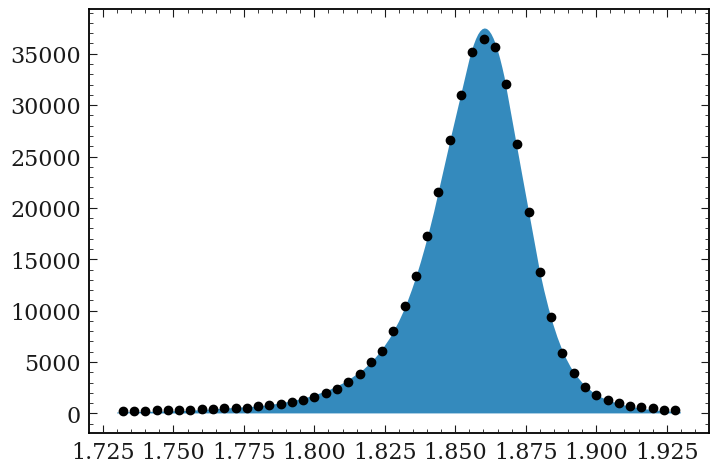

In [61]:
COST.visualize(m.values)

true entries = 388537


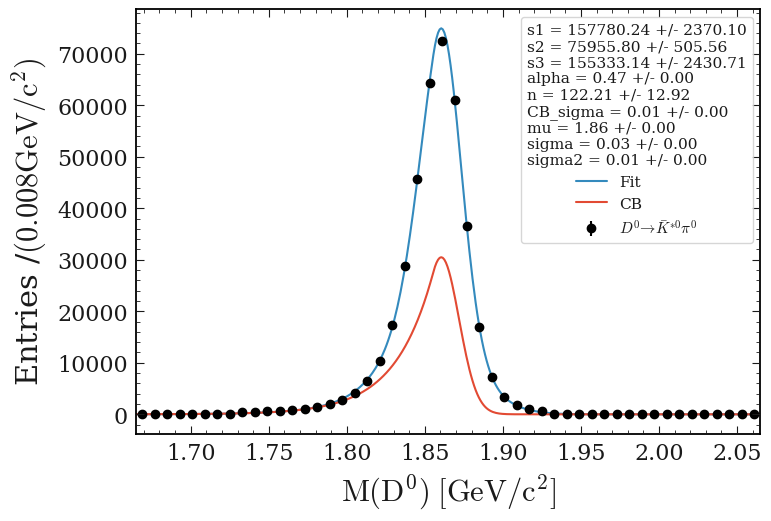

In [62]:
n, xe = np.histogram(dataset, bins=50, range=(1.665,2.065))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


# import b2plot as bp
# plt.style.use('belle2')
xrange = (1.665,2.065,400)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label=r"$D^0 \to \bar{K}^{*0} \pi^0$")

# plt.hist(dataset,density=True)

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

# plt.plot(xm, crystalball_pdf(xm, alpha=1.006, n=9.2, CB_mu=1.86272, CB_sigma=0.01294) * len(dataset) * dx[0],label="fixed(CB)")


# plt.plot(xm, crystalball.pdf(xm, *m.values) * len(dataset) * dx[0],label="fit(CB)")


plt.plot(xm, same_mu_extended_2gauss_crystalball(xm, *m.values)[1] * dx[0] ,label="Fit")
plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['alpha'], m.values['n'], m.values['mu'], m.values['CB_sigma']) * dx[0],label="CB")




# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'x-small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='x-small')

ax = plt.gca()
# ax.set_ylim(1e-1,1e5)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
# plt.savefig(this_plot_location)

# plt.yscale("log")

print("true entries = " + str(len(dataset)))
# print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

### 2d fit

In [440]:
file_loc = '/media/jykim/ssd_T5/storage/01_recon/pi0veto_calib/D2antiKstarpi0/ntuple/control_recon_mdst_5M.root'

In [441]:
base_filter = 'antiKstarpi0_rank_Dstp==1 && abs(antiKstar_InvM - 0.89555)<0.06 & abs(Dstarp_Q - 0.00593)<0.0006 & Dstarp_CMS_p>2.3'
tree = 'control'

In [442]:
signal_variables = ['D0_M','D0_cosHel_0']


In [443]:
df = get_data(file=file_loc, tree=tree, base_filter=base_filter,variables=signal_variables )


In [444]:
def cosHel_same_mu_extended_gauss_crystalball(xy, s1, s2, alpha, n, CB_sigma, mu, sigma, b1):
    x,y = xy
    func = (s1 * crystalball.pdf(x, alpha, n, mu, CB_sigma) + s2 * norm.pdf(x, mu, sigma)) *  (b1 * (y**2) * 3/2 )
#     return func
    
    return s1 + s2 + b1, func

In [445]:
def square_func(y, b1, b2):
    func = b1 * (y**2) * 3/2  + b2 * (y**2) * 3/2 
    
    return b1 + b2, func

In [446]:
def square_func1(y, b1):
    func = b1 * (y**2)  * 3/2 
    
    return b1 , func

In [465]:
df = df[(df['D0_M'] < 1.93) & (df['D0_M'] > 1.73)]

In [466]:
xdataset = df['D0_M']
ydataset = df['D0_cosHel_0']

In [467]:
print(df.corr(method='pearson'))

                D0_M  D0_cosHel_0
D0_M         1.00000      0.00645
D0_cosHel_0  0.00645      1.00000


In [468]:
print(df.corr(method='kendall'))

                 D0_M  D0_cosHel_0
D0_M         1.000000     0.001537
D0_cosHel_0  0.001537     1.000000


In [469]:
print(df.corr(method='spearman'))

                 D0_M  D0_cosHel_0
D0_M         1.000000     0.002311
D0_cosHel_0  0.002311     1.000000


In [470]:
COST = cost.ExtendedUnbinnedNLL((xdataset, ydataset), cosHel_same_mu_extended_gauss_crystalball)

m = Minuit(COST,  s1=35000,s2=80000, alpha=1, n=30, CB_sigma=0.05, mu=1.86, sigma=0.05,b1=60000)

In [471]:
m.limits["s1"]=(0,None)
m.limits["s2"]=(0,None)
m.limits["n"]=(0,None)

m.limits["alpha"]=(0,None)
m.limits["CB_sigma","sigma"]=(0, 0.1)
m.limits["mu"]=(1.80,1.90)

m.limits["b1"]=(0,None)
# m.limits["b2"]=(0,None)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -2.015e+07                 │              Nfcn = 974              │
│ EDM = 0.000997 (Goal: 0.0002)    │            time = 9.9 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1       │  305.5e3  │   0.5e3   │            │            │    0    │         │       │
│ 1 │ s2       │  83.0e3   │   0.4e3   │            │            │    0    │         │       │
│ 2 │ alpha    │   0.873   │   0.008   │            │            │    0    │         │       │
│ 3 │ n        │    8.3    │    0.2    │            │            │    0    │         │       │
│ 4 │ CB_sigma │ 13.05e-3  │  0.05e-3  │            │            │    0    │   0.1   │       │
│ 5 │ mu       │  1.86009  │  0.00005  │            │            │   1.8   │   1.9   │       │
│ 6 │ sigma    │ 25.18e-3  │  0.10e-3  │            │            │    0    │   0.1   │       │
│ 7 │ b1       │  388.5e3  │   0.5e3   │            │            │    0    │         │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬─────────────────────────────────────────────────────────────────────────────────┐
│          │        s1        s2     alpha         n  CB_sigma        mu     sigma        b1 │
├──────────┼─────────────────────────────────────────────────────────────────────────────────┤
│       s1 │  2.16e+05 -5.68e+04     0.247    -0.346   0.00244  -0.00079   0.00738 -4.43e+04 │
│       s2 │ -5.68e+04  1.83e+05     -0.42     0.503  -0.00417   0.00134   -0.0126 -8.58e+03 │
│    alpha │     0.247     -0.42  5.95e-05  -0.00128  2.54e-07 -2.77e-07  2.86e-07  -0.00793 │
│        n │    -0.346     0.503  -0.00128    0.0418 -3.17e-06  4.74e-06 -5.23e-06    0.0318 │
│ CB_sigma │   0.00244  -0.00417  2.54e-07 -3.17e-06  2.21e-09 -1.49e-09  5.12e-10 -7.34e-05 │
│       mu │  -0.00079   0.00134 -2.77e-07  4.74e-06 -1.49e-09  2.29e-09 -1.39e-09  2.52e-05 │
│    sigma │   0.00738   -0.0126  2.86e-07 -5.23e-06  5.12e-10 -1.39e-09  1.11e-08 -0.000226 │
│       b1 │ -4.43e+04 -8.58e+03  -0.00793    0.0318 -7.34e-05  2.52e-05 -0.000226  2.77e+05 │
└──────────┴─────────────────────────────────────────────────────────────────────────────────┘

In [472]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -2.015e+07                 │             Nfcn = 4570              │
│ EDM = 0.000997 (Goal: 0.0002)    │           time = 26.3 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1       │  305.5e3  │   0.5e3   │   -0.5e3   │   0.5e3    │    0    │         │       │
│ 1 │ s2       │  83.0e3   │   0.4e3   │   -0.4e3   │   0.4e3    │    0    │         │       │
│ 2 │ alpha    │   0.873   │   0.008   │   -0.008   │   0.008    │    0    │         │       │
│ 3 │ n        │    8.3    │    0.2    │    -0.2    │    0.2     │    0    │         │       │
│ 4 │ CB_sigma │ 13.05e-3  │  0.05e-3  │  -0.05e-3  │  0.05e-3   │    0    │   0.1   │       │
│ 5 │ mu       │  1.86009  │  0.00005  │  -0.00005  │  0.00005   │   1.8   │   1.9   │       │
│ 6 │ sigma    │ 25.18e-3  │  0.10e-3  │  -0.11e-3  │  0.11e-3   │    0    │   0.1   │       │
│ 7 │ b1       │  388.5e3  │   0.5e3   │   -0.6e3   │   0.6e3    │    0    │         │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │          s1           │          s2           │         alpha         │           n           │       CB_sigma        │          mu           │         sigma         │          b1           │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.5e3   │   0.5e3   │  -0.4e3   │   0.4e3   │  -0.008   │   0.008   │   -0.2    │    0.2    │ -0.05e-3  │  0.05e-3  │ -0.05e-3  │  0.05e-3  │ -0.10e-3  │  0.11e-3  │  -0.6e3   │   0.6e3   │
│  Valid   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌──────────┬─────────────────────────────────────────────────────────────────────────────────┐
│       

In [473]:
m.values

<ValueView s1=305505.41032771574 s2=83028.38271607325 alpha=0.873492441060246 n=8.295282570035633 CB_sigma=0.01304547716928203 mu=1.860090362828868 sigma=0.025177598103584994 b1=388531.68451050686>

In [474]:
m.values[0:-1]

[305505.41032771574,
 83028.38271607325,
 0.873492441060246,
 8.295282570035633,
 0.01304547716928203,
 1.860090362828868,
 0.025177598103584994]

In [487]:
n

array([  260,   250,   250,   292,   299,   311,   344,   385,   433,
         491,   523,   559,   689,   815,   956,  1099,  1294,  1601,
        1973,  2341,  3050,  3797,  4968,  6053,  8013, 10446, 13349,
       17303, 21583, 26555, 31030, 35136, 36461, 35656, 32095, 26230,
       19619, 13775,  9342,  5917,  3933,  2610,  1760,  1294,   969,
         713,   583,   486,   341,   305])

In [508]:
measure/n

array([0.32016093, 0.38333315, 0.44242906, 0.43835453, 0.49682456,
       0.55607205, 0.58728213, 0.61538081, 0.64452731, 0.67295787,
       0.752412  , 0.84397962, 0.82706156, 0.85131848, 0.89100349,
       0.95928631, 1.01589257, 1.03025858, 1.05391461, 1.12301717,
       1.09097333, 1.10856112, 1.06982066, 1.10581829, 1.04909189,
       1.00834822, 0.98753708, 0.95405674, 0.96055156, 0.98587075,
       1.033938  , 1.02907113, 1.02456961, 0.99162694, 0.95636942,
       0.93504475, 0.92549068, 0.91421166, 0.89110171, 0.9077248 ,
       0.88358292, 0.88310489, 0.89725461, 0.85694858, 0.81085705,
       0.77639192, 0.65847132, 0.53611928, 0.50615109, 0.36541316])

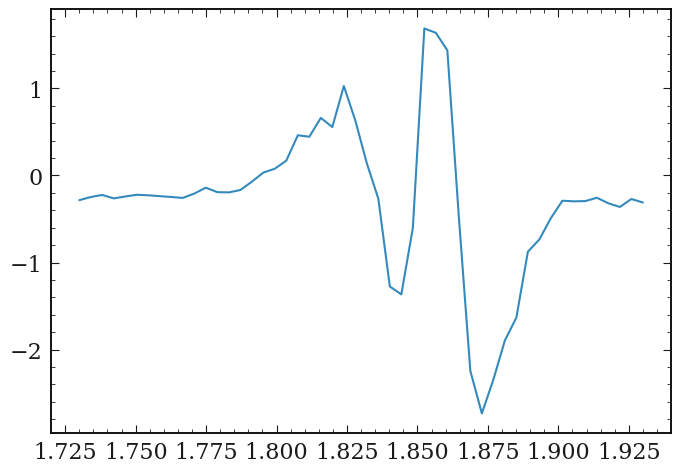

In [510]:
xrange = (1.73,1.93,50)
xm_pull = np.linspace(*xrange)

measure = same_mu_extended_gauss_crystalball(xm_pull, *m.values[0:-1])[1] * dx[0]
(measure - n) / len(xdataset)**0.5
# plt.plot(xm_pull,same_mu_extended_gauss_crystalball(xm_pull, *m.values[0:-1])[1] * dx[0])
#

plt.plot(xm_pull,(measure - n) / len(xdataset)**0.5)

(array([1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 2.,
        0., 0., 1., 2., 8., 8., 3., 2., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
        0., 0., 0., 1., 1., 0., 1., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.]),
 array([-2.73335691, -2.68912858, -2.64490026, -2.60067194, -2.55644362,
        -2.5122153 , -2.46798697, -2.42375865, -2.37953033, -2.33530201,
        -2.29107369, -2.24684536, -2.20261704, -2.15838872, -2.1141604 ,
        -2.06993208, -2.02570376, -1.98147543, -1.93724711, -1.89301879,
        -1.84879047, -1.80456215, -1.76033382, -1.7161055 , -1.67187718,
        -1.62764886, -1.58342054, -1.53919221, -1.49496389, -1.45073557,
        -1.40650725, -1.36227893, -1.31805061, -1.27382228, -1.22959396,
        -1.18536564, -1.14113732, -1.09

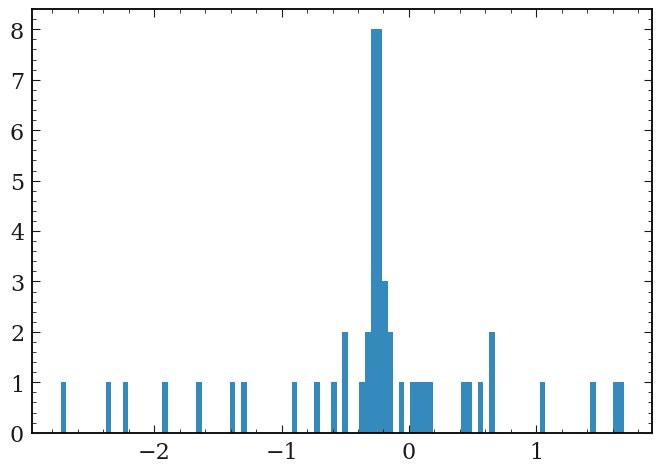

In [517]:
plt.hist((measure - n) / len(xdataset)**0.5,bins=100)

true entries = 388537


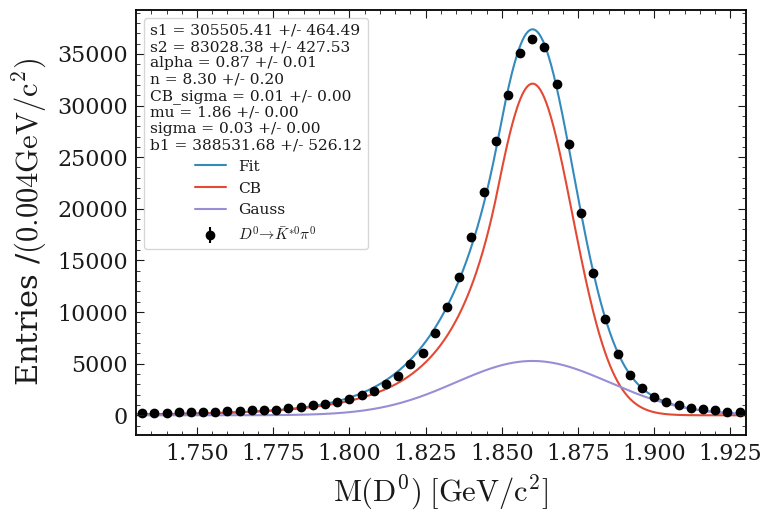

In [514]:
n, xe = np.histogram(xdataset, bins=50, range=(1.73,1.93))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


# import b2plot as bp
# plt.style.use('belle2')
xrange = (1.73,1.93,1000)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label=r"$D^0 \to \bar{K}^{*0} \pi^0$")

# plt.hist(dataset,density=True)

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

# plt.plot(xm, crystalball_pdf(xm, alpha=1.006, n=9.2, CB_mu=1.86272, CB_sigma=0.01294) * len(dataset) * dx[0],label="fixed(CB)")


# plt.plot(xm, crystalball.pdf(xm, *m.values) * len(dataset) * dx[0],label="fit(CB)")


plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values[0:-1])[1] * dx[0] ,label="Fit")
# alpha, n, mu, CB_sigma
plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['alpha'], m.values['n'], m.values['mu'], m.values['CB_sigma']) * dx[0],label="CB")

plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")




# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'x-small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='x-small')

ax = plt.gca()
# ax.set_ylim(1e-1,1e5)
# ax.set_xlim(1.665,2.065)
ax.set_xlim(1.73,1.93)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
# plt.savefig(this_plot_location)

# plt.yscale("log")

print("true entries = " + str(len(dataset)))
# print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

In [476]:
dataset

0         1.859583
3         1.815749
4         1.854300
5         1.853220
6         1.874570
            ...   
821601    1.856826
821602    1.852157
821603    1.867411
821604    1.868956
821606    1.867432
Name: D0_M, Length: 388537, dtype: float64

In [477]:
m.values[-2:]

[0.025177598103584994, 388531.68451050686]

true entries = 388537


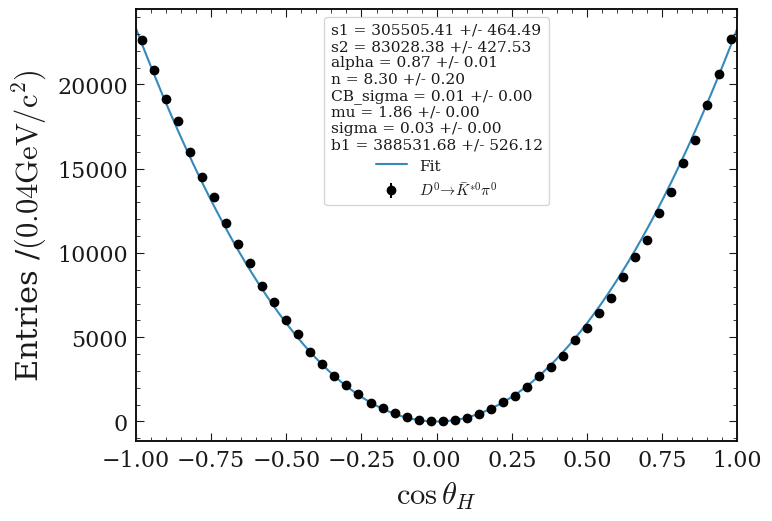

In [478]:


n, xe = np.histogram(ydataset, bins=50, range=(-1,1))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


# import b2plot as bp
# plt.style.use('belle2')
xrange = (-1,1,1000)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label=r"$D^0 \to \bar{K}^{*0} \pi^0$")

# plt.hist(dataset,density=True)

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

# plt.plot(xm, crystalball_pdf(xm, alpha=1.006, n=9.2, CB_mu=1.86272, CB_sigma=0.01294) * len(dataset) * dx[0],label="fixed(CB)")


# plt.plot(xm, crystalball.pdf(xm, *m.values) * len(dataset) * dx[0],label="fit(CB)")


# plt.plot(xm,square_func(xm, *m.values[-2:])[1] * dx[0] ,label="Fit")
plt.plot(xm,square_func1(xm, m.values[-1])[1] * dx[0] ,label="Fit")
# plt.plot(xm,square_func1(xm, m.values[-1])[1] * dx[0] ,label="Fit2")


# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values[0:-1])[1] * dx[0] ,label="Fit")
# alpha, n, mu, CB_sigma
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['alpha'], m.values['n'], m.values['mu'], m.values['CB_sigma']) * dx[0],label="CB")

# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")




# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'x-small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='x-small')

ax = plt.gca()
# ax.set_ylim(1e-1,1e5)
# ax.set_xlim(1.665,2.065)
ax.set_xlim(-1,1)
plt.xlabel(r"$\cos \theta_{H}$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
# plt.savefig(this_plot_location)

# plt.yscale("log")

print("true entries = " + str(len(dataset)))
# print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

## Generic MC

### sig+bkg

In [3]:
signal_variables = ['D0_M','Dstarp_Q','Dstarp_CMS_p','antiKstar_InvM','D0_cosHel_0']

In [4]:
ccbar_name_ctrl = '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/ccbar/D2antiKstarpi0_ccbar_recon_output_0*.root'

uubar_name_ctrl = ccbar_name_ctrl.replace("ccbar", "uubar")

ddbar_name_ctrl = ccbar_name_ctrl.replace("ccbar", "ddbar")

ssbar_name_ctrl = ccbar_name_ctrl.replace("ccbar", "ssbar")

charged_name_ctrl = ccbar_name_ctrl.replace("ccbar", "charged")

mixed_name_ctrl = ccbar_name_ctrl.replace("ccbar", "mixed")

In [5]:
# base_filter = 'ref_phi_rank_Dstp==1'

base_filter = 'abs(antiKstar_InvM - 0.89555)<0.06 && abs(Dstarp_Q - 0.00593)<0.0006 && Dstarp_CMS_p>2.4 && antiKstarpi0_rank_Dstp==1'

In [6]:
base_ccbar_1abinv_ctrl = get_data(file=ccbar_name_ctrl, tree='control', base_filter=base_filter,variables=signal_variables )

base_uubar_1abinv_ctrl = get_data(file=uubar_name_ctrl, tree='control', base_filter=base_filter,variables=signal_variables )

base_ddbar_1abinv_ctrl = get_data(file=ddbar_name_ctrl, tree='control', base_filter=base_filter,variables=signal_variables )

base_ssbar_1abinv_ctrl = get_data(file=ssbar_name_ctrl, tree='control', base_filter=base_filter,variables=signal_variables )

base_charged_1abinv_ctrl = get_data(file=charged_name_ctrl, tree='control', base_filter=base_filter,variables=signal_variables )

base_mixed_1abinv_ctrl = get_data(file=mixed_name_ctrl, tree='control', base_filter=base_filter,variables=signal_variables )

# base_taupair_1abinv_ctrl = get_data(file=taupair_name_ctrl, tree='kshort', base_filter=base_filter,variables=signal_variables )



In [7]:
cut = "antiKstar_InvM>0"

In [8]:
ccbar_1abinv_ctrl = base_ccbar_1abinv_ctrl.query(cut)
uubar_1abinv_ctrl = base_uubar_1abinv_ctrl.query(cut)
ddbar_1abinv_ctrl = base_ddbar_1abinv_ctrl.query(cut)
ssbar_1abinv_ctrl = base_ssbar_1abinv_ctrl.query(cut)
charged_1abinv_ctrl = base_charged_1abinv_ctrl.query(cut)
mixed_1abinv_ctrl = base_mixed_1abinv_ctrl.query(cut)
# taupair_1abinv_ctrl = base_taupair_1abinv_ctrl.query(cut)

D0_M


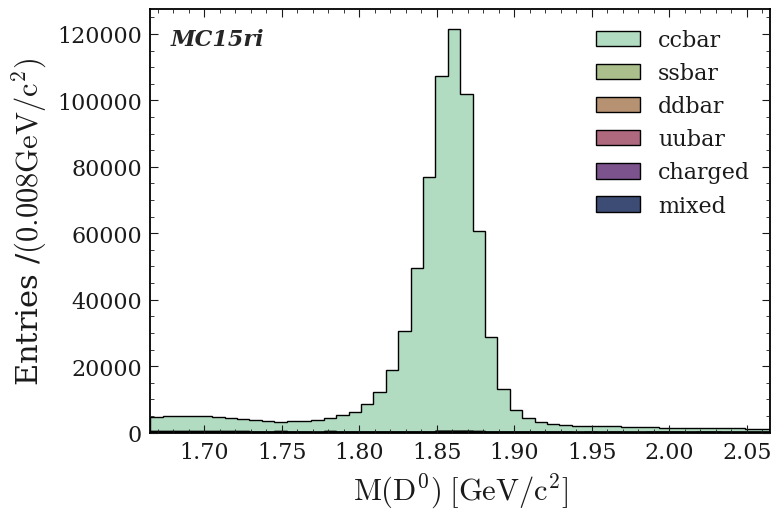

mixed = 2515
charged = 1212
uubar = 6121
ddbar = 1728
ccbar = 734591
ssbar = 2499
TOTAL # = 748666


<Figure size 800x550 with 0 Axes>

In [37]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar' ]


colors=b2helix(6)

data_list=dict()
signal_variables = ["D0_M"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar','ccbar']

    print(var)
    mixed_bkg = {var : mixed_1abinv_ctrl[var] }
    charged_bkg = {var : charged_1abinv_ctrl[var] }
    ccbar_bkg = {var : ccbar_1abinv_ctrl[var] }
    uubar_bkg = {var : uubar_1abinv_ctrl[var] }
    ddbar_bkg = {var : ddbar_1abinv_ctrl[var] }
    ssbar_bkg = {var : ssbar_1abinv_ctrl[var] }
#     taupair_bkg = {var : taupair_1abinv_Dtokshortpi0[var] }
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    plt.hist(data_list[var], bins=50, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
        
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()
#     cut = "Dstarp_CMS_p>2.4 and abs(Dstarp_Q - 0.00593) < 0.0006 and abs(kshort_M - 0.49761)<0.009"
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo=r"MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(mixed_1abinv_ctrl["D0_M"], bins=50, range=(1.665,2.065))

    ax.set_xlim(1.665,2.065)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()
print(f"mixed = {len(mixed_bkg[var])}")
print(f"charged = {len(charged_bkg[var])}")
print(f"uubar = {len(uubar_bkg[var])}")
print(f"ddbar = {len(ddbar_bkg[var])}")
print(f"ccbar = {len(ccbar_bkg[var])}")
print(f"ssbar = {len(ssbar_bkg[var])}")
# print(f"taupair = {len(taupair_bkg[var])}")

print(f"TOTAL # = {len(mixed_bkg[var]) + len(charged_bkg[var]) + len(uubar_bkg[var]) + len(ddbar_bkg[var]) + len(ssbar_bkg[var]) + len(ccbar_bkg[var]) }")


D0_cosHel_0


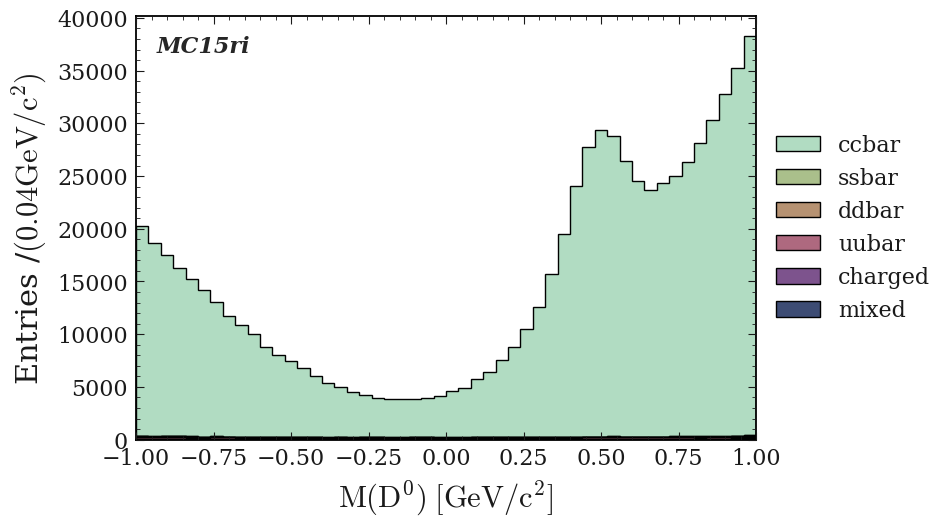

mixed = 2515
charged = 1212
uubar = 6121
ddbar = 1728
ccbar = 734591
ssbar = 2499
TOTAL # = 748666


<Figure size 800x550 with 0 Axes>

In [59]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar' ]


colors=b2helix(6)

data_list=dict()
signal_variables = ["D0_cosHel_0"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar','ccbar']

    print(var)
    mixed_bkg = {var : mixed_1abinv_ctrl[var] }
    charged_bkg = {var : charged_1abinv_ctrl[var] }
    ccbar_bkg = {var : ccbar_1abinv_ctrl[var] }
    uubar_bkg = {var : uubar_1abinv_ctrl[var] }
    ddbar_bkg = {var : ddbar_1abinv_ctrl[var] }
    ssbar_bkg = {var : ssbar_1abinv_ctrl[var] }
#     taupair_bkg = {var : taupair_1abinv_Dtokshortpi0[var] }
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    plt.hist(data_list[var], bins=50, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
        
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
#     plt.legend()
#     cut = "Dstarp_CMS_p>2.4 and abs(Dstarp_Q - 0.00593) < 0.0006 and abs(kshort_M - 0.49761)<0.009"
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo=r"MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(mixed_1abinv_ctrl["D0_cosHel_0"], bins=50, range=(-1,1))

    ax.set_xlim(-1,1)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()
print(f"mixed = {len(mixed_bkg[var])}")
print(f"charged = {len(charged_bkg[var])}")
print(f"uubar = {len(uubar_bkg[var])}")
print(f"ddbar = {len(ddbar_bkg[var])}")
print(f"ccbar = {len(ccbar_bkg[var])}")
print(f"ssbar = {len(ssbar_bkg[var])}")
# print(f"taupair = {len(taupair_bkg[var])}")

print(f"TOTAL # = {len(mixed_bkg[var]) + len(charged_bkg[var]) + len(uubar_bkg[var]) + len(ddbar_bkg[var]) + len(ssbar_bkg[var]) + len(ccbar_bkg[var]) }")


### fitting

In [9]:
all_1abinv_ctrl = pd.concat( [mixed_1abinv_ctrl, charged_1abinv_ctrl, ccbar_1abinv_ctrl, uubar_1abinv_ctrl,ddbar_1abinv_ctrl,ssbar_1abinv_ctrl ] ,ignore_index=True) 

In [10]:
def gauss_expon(x, s1, mu, sigma, s2, loc,scale):
    a = 1.67
    b = 2.06
    func = s1 * truncnorm.pdf(x, a,b, mu, sigma) +  s2 * truncexpon.pdf(x,a,b,loc,scale )  
    return s1 + s2, func

In [11]:
def same_mu_extended_gauss_crystalball(x, s1, s2, alpha, n, CB_sigma, mu, sigma):
    func = s1 * crystalball.pdf(x, alpha, n, mu, CB_sigma) + s2 * norm.pdf(x, mu, sigma)
#     return func
    s = s1 + s2
    return s, func

In [12]:
def antiKstarpi0_pdf(x, s1, s2, b1, b2, alpha, n, mu, CB_sigma, sigma, bkg_mu, bkg_sigma, loc,scale ):
    a = 1.67
    b = 2.06
    
    func = s1 * crystalball.pdf(x, alpha, n, mu, CB_sigma) + s2 * norm.pdf(x, mu, sigma) + b1 * truncnorm.pdf(x, a,b, bkg_mu, bkg_sigma) +  b2 * truncexpon.pdf(x,a,b,loc,scale )  
    return s1 + s2 + b1 + b2, func

In [13]:
dataset = all_1abinv_ctrl[(all_1abinv_ctrl['D0_M']>1.67) & (all_1abinv_ctrl['D0_M']<2.06)]['D0_M']

In [14]:
COST = cost.ExtendedUnbinnedNLL(dataset, antiKstarpi0_pdf)

m = Minuit(COST,  s1=700000, s2=100000, b1=15000, b2=73000, alpha=0.8, n=8.29, mu=1.86, CB_sigma=0.02, sigma=0.02, bkg_mu=1.6905, bkg_sigma=0.03, loc=0.5,scale=0.43 )

In [15]:
m.limits["s1"]=(0,len(dataset))
m.limits["s2"]=(0,len(dataset))
m.limits["b1"]=(0,len(dataset))
m.limits["b2"]=(0,len(dataset))

m.limits['alpha']=(0,50)
m.limits['n']=(0,300)

m.limits["mu"]=(1.80,1.90)
m.limits["CB_sigma"]=(0, 0.1)
m.limits["sigma"]=(0, 0.1)

m.limits['bkg_mu']=(1.5,1.9)
m.limits["bkg_sigma"]=(0, 0.1)

m.limits["loc"]=(0,2)
m.limits["scale"]=(0,1)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -2.165e+07                 │             Nfcn = 5388              │
│ EDM = 15.7 (Goal: 0.0002)        │           time = 160.4 sec           │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name      │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1        │   530e3   │    5e3    │            │            │    0    │ 745276  │       │
│ 1 │ s2        │   85e3    │    6e3    │            │            │    0    │ 745276  │       │
│ 2 │ b1        │   7.5e3   │   0.4e3   │            │            │    0    │ 745276  │       │
│ 3 │ b2        │  121.8e3  │   0.8e3   │            │            │    0    │ 745276  │       │
│ 4 │ alpha     │   1.012   │   0.006   │            │            │    0    │   50    │       │
│ 5 │ n         │    111    │    14     │            │            │    0    │   300   │       │
│ 6 │ mu        │ 1.858994  │ 0.000033  │            │            │   1.8   │   1.9   │       │
│ 7 │ CB_sigma  │ 16.65e-3  │  0.08e-3  │            │            │    0    │   0.1   │       │
│ 8 │ sigma     │ 10.40e-3  │  0.17e-3  │            │            │    0    │   0.1   │       │
│ 9 │ bkg_mu    │  1.6941   │  0.0009   │            │            │   1.5   │   1.9   │       │
│ 10│ bkg_sigma │  20.9e-3  │  0.8e-3   │            │            │    0    │   0.1   │       │
│ 11│ loc       │    0.1    │    1.3    │            │            │    0    │    2    │       │
│ 12│ scale     │   0.364   │   0.006   │            │            │    0    │    1    │       │
└───┴───────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────────┬───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│           │        s1        s2        b1        b2     alpha         n        mu  CB_sigma     sigma    bkg_mu bkg_sigma       loc     scale │
├───────────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        s1 │     3e+07 -3.05e+07 -5.64e+05  1.57e+06      9.67  -3.2e+03    0.0666    -0.368    -0.706     0.177    -0.508  6.83e+03     -6.45 │
│        s2 │ -3.05e+07  3.19e+07  6.73e+05 -1.86e+06     -10.7   2.8e+03   -0.0683     0.387     0.729    -0.202     0.619 -7.04e+03      7.69 │
│        b1 │ -5.64e+05  6.73e+05  1.63e+05 -2.61e+05    -0.758      -251 -0.000519    0.0091    0.0124   -0.0296     0.172      -162      1.82 │
│        b2 │  1.57e+06 -1.86e+06 -2.61e+05  6.59e+05      1.71       658   0.00204   -0.0267   -0.0327    0.0538     -0.28       420     -3.03 │
│     alpha │      9.67     -10.7    -0.758      1.71  3.15e-05   -0.0152 -7.26e-08  1.04e-08 -3.76e-07  2.55e-07 -7.02e-07   0.00363 -1.16e-05 │
│         n │  -3.2e+03   2.8e+03      -251       658   -0.0152       184  1.66e-05  1.15e-05  5.33e-05  0.000173 -0.000163     0.402  -0.00444 │
│        mu │    0.0666   -0.0683 -0.000519   0.00204 -7.26e-08  1.66e-05  1.07e-09 -1.42e-09  -1.2e-09  2.62e-11 -5.77e-10  1.01e-05  1.61e-1

In [121]:
m.minos()

RuntimeError: Function minimum is not valid: <FMin algorithm='Migrad' edm=nan edm_goal=0.0002 errordef=1.0 fval=-21645358.664617315 has_accurate_covar=True has_covariance=True has_made_posdef_covar=False has_parameters_at_limit=False has_posdef_covar=True has_reached_call_limit=False has_valid_parameters=False hesse_failed=False is_above_max_edm=True is_valid=False nfcn=901 ngrad=0 reduced_chi2=nan time=28.444361116999062>

true entries = 745276
signal yield = 614948.2478284803
bkg yield = 129310.19657602257


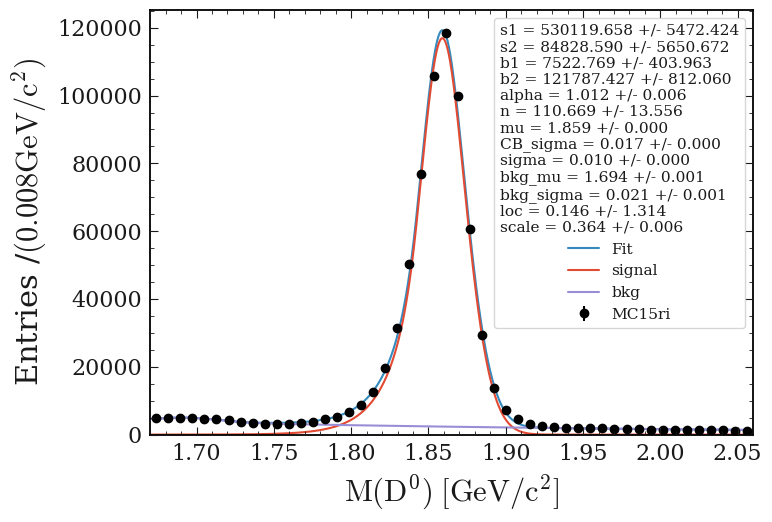

In [17]:
n, xe = np.histogram(dataset, bins=50, range=(1.67,2.06))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])

a,b = 1.67, 2.06
# import b2plot as bp
# plt.style.use('belle2')
xrange = (1.67,2.06,1000)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label=r"MC15ri")

# plt.hist(dataset,density=True)

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")


plt.plot(xm, antiKstarpi0_pdf(xm, *m.values)[1] * dx[0] ,label="Fit")

plt.plot(xm,( m.values['s1'] * crystalball.pdf(xm, m.values['alpha'], m.values['n'], m.values['mu'], m.values['CB_sigma']) + m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma'])) * dx[0] ,label="signal")

plt.plot(xm,( m.values['b1'] * truncnorm.pdf(xm, a,b, m.values['bkg_mu'], m.values['bkg_sigma']) + m.values['b2'] * truncexpon.pdf(xm, a,b, m.values['loc'], m.values['scale'])) * dx[0] ,label="bkg")


# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.3f} +/- {m.errors[par]:.3f}"
    )

plt.rcParams['legend.title_fontsize'] = 'x-small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='x-small')

ax = plt.gca()
# ax.set_ylim(1e-1,1e5)
# ax.set_xlim(1.665,2.065)
ax.set_xlim(1.67,2.06)
ax.set_ylim(0,None)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
# plt.savefig(this_plot_location)

# plt.yscale("log")


print("true entries = " + str(len(dataset)))
print(f"signal yield = {m.values['s1'] + m.values['s2']}")
print(f"bkg yield = {m.values['b1'] + m.values['b2']}")
# print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

true entries = 748666
signal yield = 682415.8731883975
bkg yield = 66254.19752206224


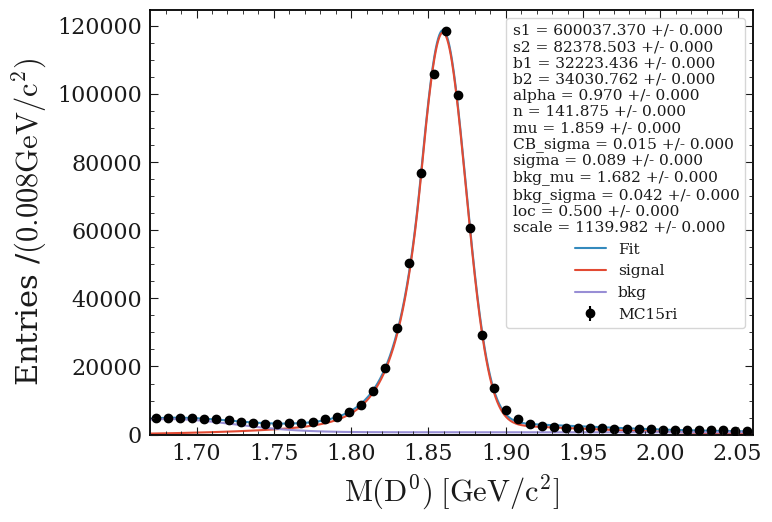

In [64]:
n, xe = np.histogram(dataset, bins=50, range=(1.67,2.06))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])

a,b = 1.67, 2.06
# import b2plot as bp
# plt.style.use('belle2')
xrange = (1.67,2.06,1000)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label=r"MC15ri")

# plt.hist(dataset,density=True)

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

# plt.plot(xm, crystalball_pdf(xm, alpha=1.006, n=9.2, CB_mu=1.86272, CB_sigma=0.01294) * len(dataset) * dx[0],label="fixed(CB)")


# plt.plot(xm, crystalball.pdf(xm, *m.values) * len(dataset) * dx[0],label="fit(CB)")


plt.plot(xm, antiKstarpi0_pdf(xm, *m.values)[1] * dx[0] ,label="Fit")

plt.plot(xm,( m.values['s1'] * crystalball.pdf(xm, m.values['alpha'], m.values['n'], m.values['mu'], m.values['CB_sigma']) + m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma'])) * dx[0] ,label="signal")


plt.plot(xm,( m.values['b1'] * truncnorm.pdf(xm, a,b, m.values['bkg_mu'], m.values['bkg_sigma']) + m.values['b2'] * truncexpon.pdf(xm, a,b, m.values['loc'], m.values['scale'])) * dx[0] ,label="bkg")


# truncnorm.pdf(x, a,b, mu, sigma)
# plt.plot(xm, m.values['s1']* truncnorm.pdf(xm, a,b,m.values['mu'],m.values['sigma']) * dx[0] ,label="Fit")
# plt.plot(xm, m.values['s2']* truncexpon.pdf(xm, a,b,m.values['loc'],m.values['scale']) * dx[0] ,label="Fit")

# alpha, n, mu, CB_sigma




# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.3f} +/- {m.errors[par]:.3f}"
    )

plt.rcParams['legend.title_fontsize'] = 'x-small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='x-small')

ax = plt.gca()
# ax.set_ylim(1e-1,1e5)
# ax.set_xlim(1.665,2.065)
ax.set_xlim(1.67,2.06)
ax.set_ylim(0,None)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
# plt.savefig(this_plot_location)

# plt.yscale("log")


print("true entries = " + str(len(dataset)))
print(f"signal yield = {m.values['s1'] + m.values['s2']}")
print(f"bkg yield = {m.values['b1'] + m.values['b2']}")
# print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

In [71]:
10**(18) * 1.3 * 10**(-9) * 0.255 * 0.677 * 0.0195 * ( 388537/5000000) * 2

680141.3618493001

### only bkg

In [3]:
signal_variables = ['D0_M','Dstarp_Q','Dstarp_CMS_p','antiKstar_InvM','D0_cosHel_0','D0_D0_M_before']

In [4]:
ccbar_name_ctrl = '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/ccbar/D2antiKstarpi0_ccbar_only_bkg_recon_output_0*.root'

uubar_name_ctrl = ccbar_name_ctrl.replace("ccbar", "uubar")

ddbar_name_ctrl = ccbar_name_ctrl.replace("ccbar", "ddbar")

ssbar_name_ctrl = ccbar_name_ctrl.replace("ccbar", "ssbar")

charged_name_ctrl = ccbar_name_ctrl.replace("ccbar", "charged")

mixed_name_ctrl = ccbar_name_ctrl.replace("ccbar", "mixed")

In [5]:
# base_filter = 'ref_phi_rank_Dstp==1'

base_filter = 'abs(antiKstar_InvM - 0.89555)<0.06 && abs(Dstarp_Q - 0.00593)<0.0006 && Dstarp_CMS_p>2.4 && antiKstarpi0_rank_Dstp==1'

In [6]:
base_ccbar_1abinv_ctrl_bkg = get_data(file=ccbar_name_ctrl, tree='control', base_filter=base_filter,variables=signal_variables )

base_uubar_1abinv_ctrl_bkg = get_data(file=uubar_name_ctrl, tree='control', base_filter=base_filter,variables=signal_variables )

base_ddbar_1abinv_ctrl_bkg = get_data(file=ddbar_name_ctrl, tree='control', base_filter=base_filter,variables=signal_variables )

base_ssbar_1abinv_ctrl_bkg = get_data(file=ssbar_name_ctrl, tree='control', base_filter=base_filter,variables=signal_variables )

base_charged_1abinv_ctrl_bkg = get_data(file=charged_name_ctrl, tree='control', base_filter=base_filter,variables=signal_variables )

base_mixed_1abinv_ctrl_bkg = get_data(file=mixed_name_ctrl, tree='control', base_filter=base_filter,variables=signal_variables )

# base_taupair_1abinv_ctrl = get_data(file=taupair_name_ctrl, tree='kshort', base_filter=base_filter,variables=signal_variables )



In [7]:
cut = "D0_M>1.665 & D0_M<2.065"

In [8]:
ccbar_1abinv_ctrl_bkg = base_ccbar_1abinv_ctrl_bkg.query(cut)
uubar_1abinv_ctrl_bkg = base_uubar_1abinv_ctrl_bkg.query(cut)
ddbar_1abinv_ctrl_bkg = base_ddbar_1abinv_ctrl_bkg.query(cut)
ssbar_1abinv_ctrl_bkg = base_ssbar_1abinv_ctrl_bkg.query(cut)
charged_1abinv_ctrl_bkg = base_charged_1abinv_ctrl_bkg.query(cut)
mixed_1abinv_ctrl_bkg = base_mixed_1abinv_ctrl_bkg.query(cut)
# taupair_1abinv_ctrl = base_taupair_1abinv_ctrl.query(cut)

D0_M


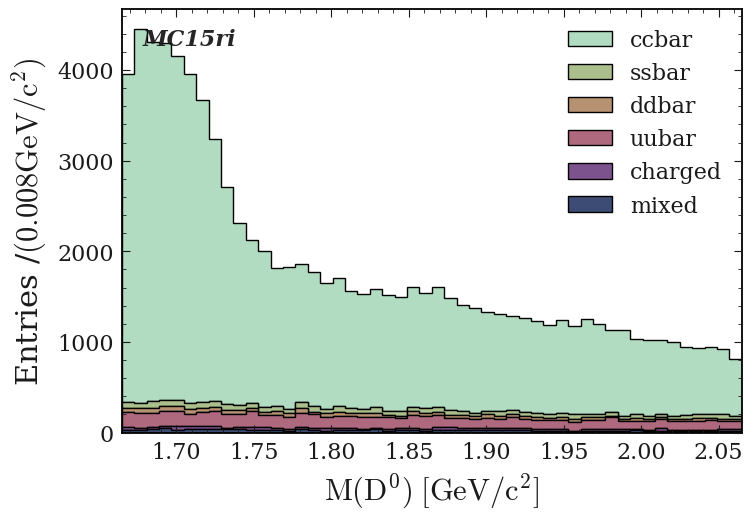

mixed = 1311
charged = 1141
uubar = 6171
ddbar = 1754
ccbar = 78986
ssbar = 2530
TOTAL # = 91893


<Figure size 800x550 with 0 Axes>

In [10]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar' ]

xrange = (1.665,2.065,51)
xm = np.linspace(*xrange)

colors=b2helix(6)

data_list=dict()
signal_variables = ["D0_M"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar','ccbar']

    print(var)
    mixed_bkg = {var : mixed_1abinv_ctrl_bkg[var] }
    charged_bkg = {var : charged_1abinv_ctrl_bkg[var] }
    ccbar_bkg = {var : ccbar_1abinv_ctrl_bkg[var] }
    uubar_bkg = {var : uubar_1abinv_ctrl_bkg[var] }
    ddbar_bkg = {var : ddbar_1abinv_ctrl_bkg[var] }
    ssbar_bkg = {var : ssbar_1abinv_ctrl_bkg[var] }
#     taupair_bkg = {var : taupair_1abinv_Dtokshortpi0[var] }
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    plt.hist(data_list[var], bins=xm, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
        
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()
#     cut = "Dstarp_CMS_p>2.4 and abs(Dstarp_Q - 0.00593) < 0.0006 and abs(kshort_M - 0.49761)<0.009"
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo=r"MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(mixed_1abinv_ctrl_bkg["D0_M"], bins=50, range=(1.665,2.065))

    ax.set_xlim(1.665,2.065)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()
print(f"mixed = {len(mixed_bkg[var])}")
print(f"charged = {len(charged_bkg[var])}")
print(f"uubar = {len(uubar_bkg[var])}")
print(f"ddbar = {len(ddbar_bkg[var])}")
print(f"ccbar = {len(ccbar_bkg[var])}")
print(f"ssbar = {len(ssbar_bkg[var])}")
# print(f"taupair = {len(taupair_bkg[var])}")

print(f"TOTAL # = {len(mixed_bkg[var]) + len(charged_bkg[var]) + len(uubar_bkg[var]) + len(ddbar_bkg[var]) + len(ssbar_bkg[var]) + len(ccbar_bkg[var]) }")


In [20]:
ccbar_bkg

{'D0_M': 0        2.000668
 1        1.727073
 2        1.817728
 3        2.043033
 4        1.918871
            ...   
 78981    1.965898
 78982    1.742095
 78983    1.671422
 78984    1.843326
 78985    1.807155
 Name: D0_M, Length: 78986, dtype: float64}

In [21]:
# plt.hist(ccbar_bkg['D0_D0_M_before'],bins=np.linspace(1.68,2.06,51))

KeyError: 'D0_D0_M_before'

D0_D0_M_before


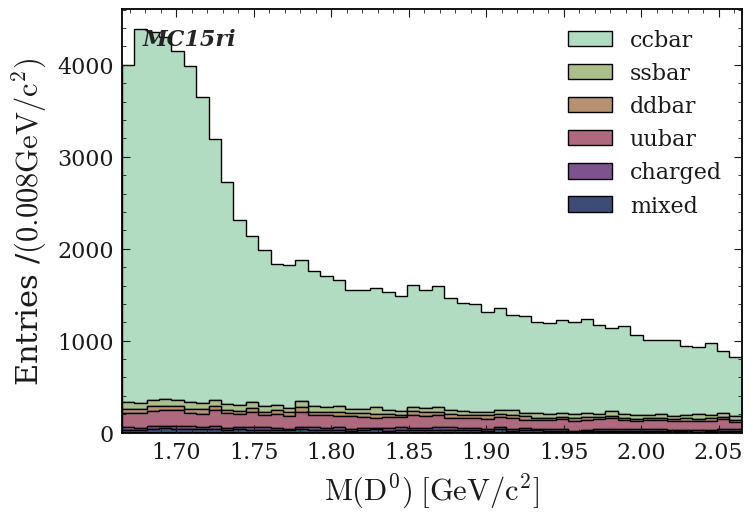

mixed = 1311
charged = 1141
uubar = 6171
ddbar = 1754
ccbar = 78986
ssbar = 2530
TOTAL # = 91893


<Figure size 800x550 with 0 Axes>

In [22]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar' ]

xrange = (1.665,2.065,51)
xm = np.linspace(*xrange)

colors=b2helix(6)

data_list=dict()
signal_variables = ["D0_D0_M_before"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar','ccbar']

    print(var)
    mixed_bkg = {var : mixed_1abinv_ctrl_bkg[var] }
    charged_bkg = {var : charged_1abinv_ctrl_bkg[var] }
    ccbar_bkg = {var : ccbar_1abinv_ctrl_bkg[var] }
    uubar_bkg = {var : uubar_1abinv_ctrl_bkg[var] }
    ddbar_bkg = {var : ddbar_1abinv_ctrl_bkg[var] }
    ssbar_bkg = {var : ssbar_1abinv_ctrl_bkg[var] }
#     taupair_bkg = {var : taupair_1abinv_Dtokshortpi0[var] }
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    plt.hist(data_list[var], bins=xm, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
        
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()
#     cut = "Dstarp_CMS_p>2.4 and abs(Dstarp_Q - 0.00593) < 0.0006 and abs(kshort_M - 0.49761)<0.009"
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo=r"MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(mixed_1abinv_ctrl_bkg["D0_M"], bins=50, range=(1.665,2.065))

    ax.set_xlim(1.665,2.065)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()
print(f"mixed = {len(mixed_bkg[var])}")
print(f"charged = {len(charged_bkg[var])}")
print(f"uubar = {len(uubar_bkg[var])}")
print(f"ddbar = {len(ddbar_bkg[var])}")
print(f"ccbar = {len(ccbar_bkg[var])}")
print(f"ssbar = {len(ssbar_bkg[var])}")
# print(f"taupair = {len(taupair_bkg[var])}")

print(f"TOTAL # = {len(mixed_bkg[var]) + len(charged_bkg[var]) + len(uubar_bkg[var]) + len(ddbar_bkg[var]) + len(ssbar_bkg[var]) + len(ccbar_bkg[var]) }")


D0_cosHel_0


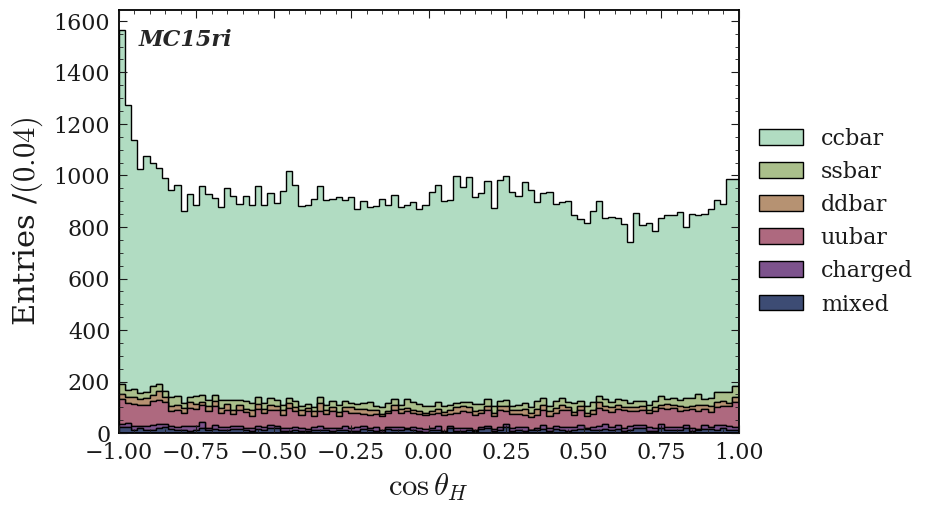

mixed = 1311
charged = 1141
uubar = 6171
ddbar = 1754
ccbar = 78986
ssbar = 2530
TOTAL # = 91893


<Figure size 800x550 with 0 Axes>

In [23]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar' ]


colors=b2helix(6)

data_list=dict()
signal_variables = ["D0_cosHel_0"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar','ccbar']

    print(var)
    mixed_bkg = {var : mixed_1abinv_ctrl_bkg[var] }
    charged_bkg = {var : charged_1abinv_ctrl_bkg[var] }
    ccbar_bkg = {var : ccbar_1abinv_ctrl_bkg[var] }
    uubar_bkg = {var : uubar_1abinv_ctrl_bkg[var] }
    ddbar_bkg = {var : ddbar_1abinv_ctrl_bkg[var] }
    ssbar_bkg = {var : ssbar_1abinv_ctrl_bkg[var] }
#     taupair_bkg = {var : taupair_1abinv_Dtokshortpi0[var] }
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    plt.hist(data_list[var], bins=100, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
        
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
#     plt.legend()
#     cut = "Dstarp_CMS_p>2.4 and abs(Dstarp_Q - 0.00593) < 0.0006 and abs(kshort_M - 0.49761)<0.009"
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo=r"MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(mixed_1abinv_ctrl_bkg["D0_cosHel_0"], bins=50, range=(-1,1))

    ax.set_xlim(-1,1)
#     ax.set_ylim(0,6000)

    plt.xlabel(r"$\cos \theta_H$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + ')$');
    plt.show()
    plt.clf()
print(f"mixed = {len(mixed_bkg[var])}")
print(f"charged = {len(charged_bkg[var])}")
print(f"uubar = {len(uubar_bkg[var])}")
print(f"ddbar = {len(ddbar_bkg[var])}")
print(f"ccbar = {len(ccbar_bkg[var])}")
print(f"ssbar = {len(ssbar_bkg[var])}")
# print(f"taupair = {len(taupair_bkg[var])}")

print(f"TOTAL # = {len(mixed_bkg[var]) + len(charged_bkg[var]) + len(uubar_bkg[var]) + len(ddbar_bkg[var]) + len(ssbar_bkg[var]) + len(ccbar_bkg[var]) }")


### fitting

In [9]:
all_1abinv_ctrl_bkg = pd.concat( [mixed_1abinv_ctrl_bkg, charged_1abinv_ctrl_bkg, ccbar_1abinv_ctrl_bkg, uubar_1abinv_ctrl_bkg,ddbar_1abinv_ctrl_bkg,ssbar_1abinv_ctrl_bkg ] ,ignore_index=True) 

In [10]:
all_1abinv_ctrl_bkg.describe()

,D0_M,Dstarp_Q,Dstarp_CMS_p,antiKstar_InvM,D0_cosHel_0,D0_D0_M_before
count,91893.000000,91893.000000,91893.000000,91893.000000,91893.000000,91893.000000
mean,1.810211,0.005933,2.998726,0.897483,-0.031181,1.810166
std,0.114552,0.000346,0.487422,0.032683,0.583803,0.114563
min,1.665004,0.005330,2.400014,0.835551,-0.999994,1.665007
25%,1.708575,0.005633,2.602200,0.871421,-0.538813,1.708618
50%,1.781776,0.005936,2.875591,0.897974,-0.033311,1.781790
75%,1.899326,0.006232,3.285858,0.924350,0.459231,1.899274
max,2.064996,0.006530,5.275587,0.955550,0.999951,2.065000


In [11]:
# def gauss_2nd_poly(x, s1, mu, sigma, s2, c1, c2):
#     x
#     func = s1 * norm.pdf(x, mu, sigma) +  s2 * (c1*x + c2*(x**2) )  
# #     return func
    
#     return s1 + s2, func

In [24]:
def gauss_expon(x, s1, mu, sigma, s2, loc,scale):
    a = 1.67
    b = 2.06
    func = s1 * truncnorm.pdf(x, a,b, mu, sigma) +  s2 * truncexpon.pdf(x,a,b,loc,scale )  
    return s1 + s2, func

In [25]:
dataset = all_1abinv_ctrl_bkg['D0_M']

In [26]:
COST = cost.ExtendedUnbinnedNLL(dataset, gauss_expon)

m = Minuit(COST,  s1=15000, mu=1.69, sigma=0.02, s2=70000, loc=1, scale=0.3)

In [27]:
m.limits["s1"]=(0,None)
m.limits["s2"]=(0,None)

m.limits["sigma"]=(0, 0.1)
m.limits["mu"]=(1.50,1.90)

m.limits["loc"]=(0,None)
m.limits["scale"]=(0,None)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.241e+06                  │              Nfcn = 214              │
│ EDM = 5.27e-05 (Goal: 0.0002)    │            time = 0.3 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1    │ 15.4578e3 │ 0.0020e3  │            │            │    0    │         │       │
│ 1 │ mu    │  1.6905   │  0.0008   │            │            │   1.5   │   1.9   │       │
│ 2 │ sigma │  28.5e-3  │  0.7e-3   │            │            │    0    │   0.1   │       │
│ 3 │ s2    │ 73.5566e3 │ 0.0020e3  │            │            │    0    │         │       │
│ 4 │ loc   │    0.5    │    1.0    │            │            │    0    │         │       │
│ 5 │ scale │   0.430   │   0.007   │            │            │    0    │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────────────────────────┐
│       │        s1        mu     sigma        s2       loc     scale │
├───────┼─────────────────────────────────────────────────────────────┤
│    s1 │         4 -1.22e-06  3.85e-06 -0.000157  1.63e-11  7.27e-05 │
│    mu │ -1.22e-06  6.91e-07 -4.14e-07  2.57e-07  -1.8e-12 -2.14e-07 │
│ sigma │  3.85e-06 -4.14e-07  4.44e-07 -8.09e-07  1.93e-12   1.1e-07 │
│    s2 │ -0.000157  2.57e-07 -8.09e-07         4  1.12e-08 -1.53e-05 │
│   loc │  1.63e-11  -1.8e-12  1.93e-12  1.12e-08      2.27  4.35e-13 │
│ scale │  7.27e-05 -2.14e-07   1.1e-07 -1.53e-05  4.35e-13   4.6e-05 │
└───────┴─────────────────────────────────────────────────────────────┘

In [28]:
# COST.visualize(m.values)

true entries = 91893


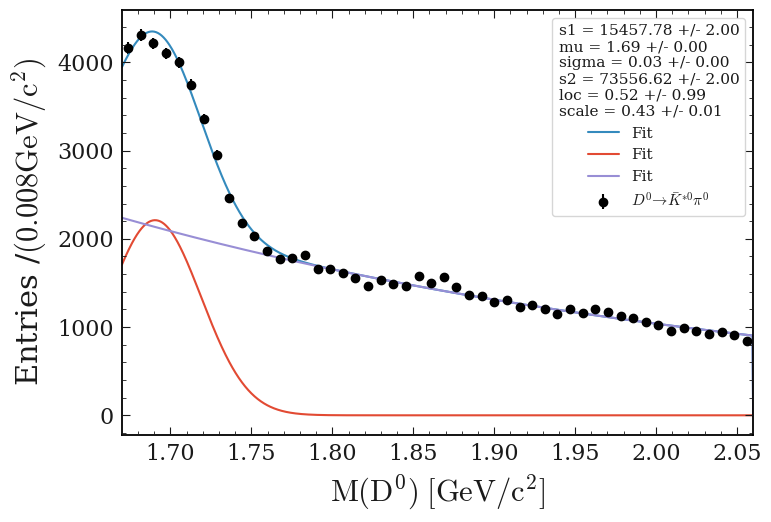

In [29]:
n, xe = np.histogram(dataset, bins=50, range=(1.67,2.06))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])

a,b = 1.67, 2.06
# import b2plot as bp
# plt.style.use('belle2')
xrange = (1.67,2.06,1000)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label=r"$D^0 \to \bar{K}^{*0} \pi^0$")

# plt.hist(dataset,density=True)

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

# plt.plot(xm, crystalball_pdf(xm, alpha=1.006, n=9.2, CB_mu=1.86272, CB_sigma=0.01294) * len(dataset) * dx[0],label="fixed(CB)")


# plt.plot(xm, crystalball.pdf(xm, *m.values) * len(dataset) * dx[0],label="fit(CB)")


plt.plot(xm, gauss_expon(xm, *m.values)[1] * dx[0] ,label="Fit")
# truncnorm.pdf(x, a,b, mu, sigma)
plt.plot(xm, m.values['s1']* truncnorm.pdf(xm, a,b,m.values['mu'],m.values['sigma']) * dx[0] ,label="Fit")
plt.plot(xm, m.values['s2']* truncexpon.pdf(xm, a,b,m.values['loc'],m.values['scale']) * dx[0] ,label="Fit")

# alpha, n, mu, CB_sigma




# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'x-small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='x-small')

ax = plt.gca()
# ax.set_ylim(1e-1,1e5)
# ax.set_xlim(1.665,2.065)
ax.set_xlim(1.67,2.06)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
# plt.savefig(this_plot_location)

# plt.yscale("log")

print("true entries = " + str(len(dataset)))
# print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

# D2antiKstargamma

In [436]:
file_loc = '/media/jykim/ssd_T5/storage/01_recon/pi0veto_calib/D2antiKstarpi0/ntuple/control_recon_mdst_5M.root'

In [437]:
# base_filter = 'antiKstarpi0_rank_Dstp==1'
base_filter = 'Pis_charge==1'
tree = 'antiKstargamma'

In [438]:
signal_variables = ['D0_M','antiKstar_InvM','Dstarp_Q','Dstarp_CMS_p','Dstarp_isSignal','Pis_charge','Pi0_Prob']


In [439]:
pd_D2antiKstargamma = get_data(file=file_loc, tree=tree, base_filter=base_filter,variables=signal_variables )


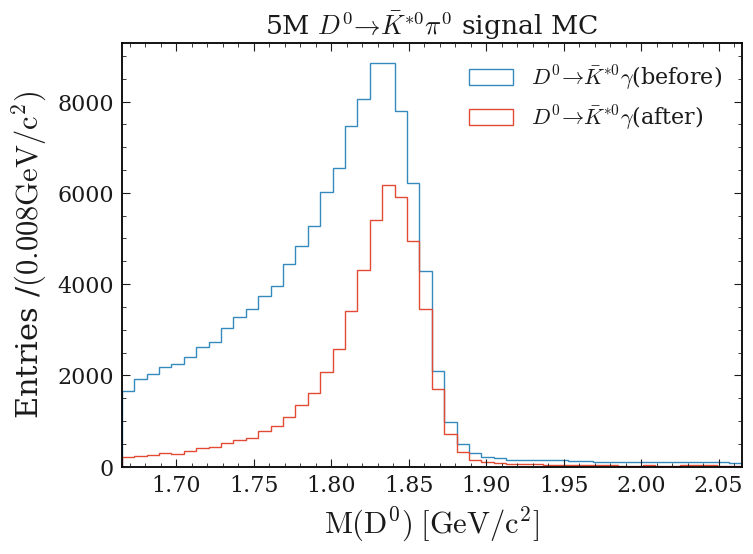

In [450]:
fig = plt.figure()
ax = fig.subplots()

xrange = (1.665,2.065,51)
xm = np.linspace(*xrange)


df = pd_D2antiKstargamma.query('abs(antiKstar_InvM - 0.89555)<0.06 & abs(Dstarp_Q - 0.00593)<0.0006 & Dstarp_CMS_p>2.3')
plt.hist(df["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to \bar{K}^{*0} \gamma$(before)');

df = pd_D2antiKstargamma.query('Pi0_Prob<0.9 & abs(antiKstar_InvM - 0.89555)<0.06 & abs(Dstarp_Q - 0.00593)<0.0006 & Dstarp_CMS_p>2.3')
plt.hist(df["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to \bar{K}^{*0} \gamma$(after)');

plt.legend(loc="best")
# ax.set_title(r'$D^0 \to K^0_S \gamma$ in ' )
ax.set_title(r'5M $D^0 \to \bar{K}^{*0} \pi^0$ signal MC')
ax.set_xlim(1.665,2.065)

n, xe = np.histogram(df["D0_M"], bins=50, range=(1.665,2.065))

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.4f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');


## Signal MC

### After pi0 veto

In [535]:
def signal_crystalball(x, s, alpha, n, CB_mu, CB_sigma):
    func = s * crystalball.pdf(x,alpha, n, CB_mu, CB_sigma)
    return s, func

In [536]:
dataset = df
dataset = dataset[(dataset['D0_M'] < 1.90) & (dataset['D0_M'] > 1.67)  ]['D0_M']

In [537]:
PDF = signal_crystalball

In [538]:
COST = cost.ExtendedUnbinnedNLL(dataset, PDF)
m = Minuit(COST, s=50000 ,alpha=0.51, n=50, CB_mu=1.84,CB_sigma=0.02)

In [539]:
m.limits["alpha"]=(0,30)
m.limits["n"]=(0,None)
# m.limits["CB_mu"]=(1.78,1.90)
m.limits["CB_sigma"]=(0, 0.5)


m.limits["s"]=(0,None)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.202e+06                 │              Nfcn = 260              │
│ EDM = 5.21 (Goal: 0.0002)        │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s        │  50.87e3  │  0.23e3   │            │            │    0    │         │       │
│ 1 │ alpha    │   0.474   │   0.006   │            │            │    0    │   30    │       │
│ 2 │ n        │    103    │    21     │            │            │    0    │         │       │
│ 3 │ CB_mu    │  1.84054  │  0.00021  │            │            │         │         │       │
│ 4 │ CB_sigma │ 18.07e-3  │  0.14e-3  │            │            │    0    │   0.5   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────────────────────────────────┐
│          │         s     alpha         n     CB_mu  CB_sigma │
├──────────┼───────────────────────────────────────────────────┤
│        s │  5.06e+04 -2.99e-05     0.274  8.44e-07 -3.68e-07 │
│    alpha │ -2.99e-05  3.04e-05   -0.0424 -9.01e-07  6.54e-07 │
│        n │     0.274   -0.0424       448  0.000562 -0.000231 │
│    CB_mu │  8.44e-07 -9.01e-07  0.000562  4.29e-08 -2.33e-08 │
│ CB_sigma │ -3.68e-07  6.54e-07 -0.000231 -2.33e-08  2.05e-08 │
└──────────┴───────────────────────────────────────────────────┘

In [540]:
m.minos()

RuntimeError: Function minimum is not valid: <FMin algorithm='Migrad' edm=5.206805088145364 edm_goal=0.0002 errordef=1.0 fval=-1202438.0001306138 has_accurate_covar=True has_covariance=True has_made_posdef_covar=False has_parameters_at_limit=False has_posdef_covar=True has_reached_call_limit=False has_valid_parameters=False hesse_failed=False is_above_max_edm=True is_valid=False nfcn=260 ngrad=0 reduced_chi2=nan time=0.18244467799377162>

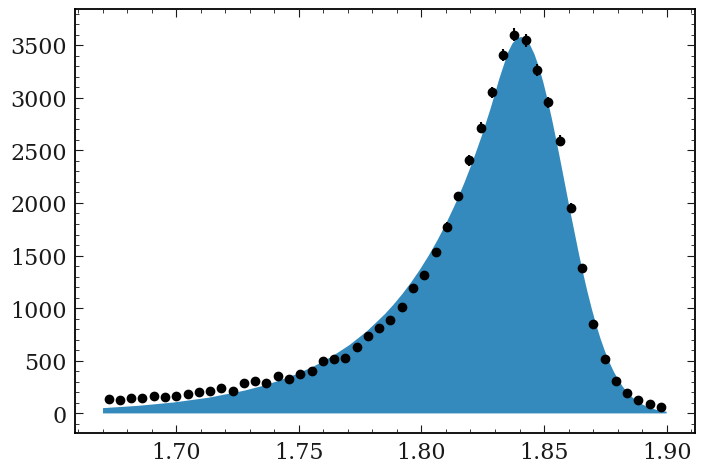

In [541]:
COST.visualize(m.values)

In [542]:
m.interactive()

true entries = 50955


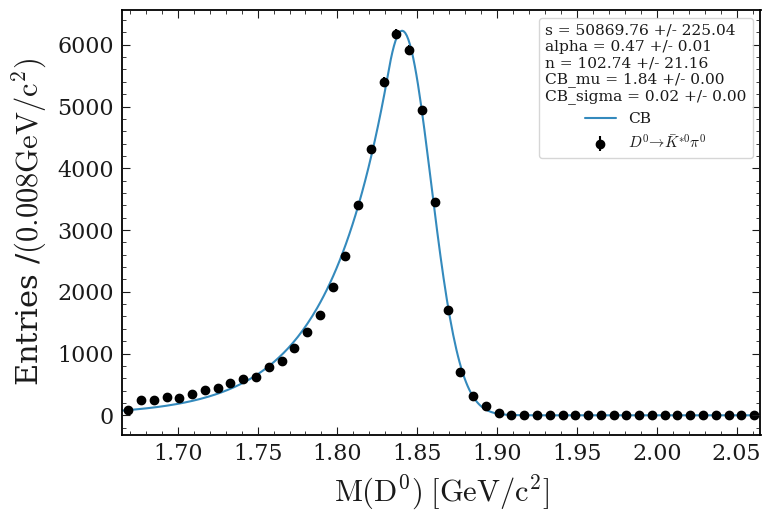

In [543]:
n, xe = np.histogram(dataset, bins=50, range=(1.665,2.065))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


# import b2plot as bp
# plt.style.use('belle2')
xrange = (1.665,2.065,400)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label=r"$D^0 \to \bar{K}^{*0} \pi^0$")

# plt.hist(dataset,density=True)

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

# plt.plot(xm, crystalball_pdf(xm, alpha=1.006, n=9.2, CB_mu=1.86272, CB_sigma=0.01294) * len(dataset) * dx[0],label="fixed(CB)")


# plt.plot(xm, crystalball.pdf(xm, *m.values) * len(dataset) * dx[0],label="fit(CB)")


plt.plot(xm, signal_crystalball(xm, *m.values)[1] * dx[0] ,label="CB")


# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'x-small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='x-small')

ax = plt.gca()
# ax.set_ylim(1e-1,1e5)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
# plt.savefig(this_plot_location)

# plt.yscale("log")

print("true entries = " + str(len(dataset)))
# print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

### Before pi0 veto

In [586]:
df = pd_D2antiKstargamma.query('abs(antiKstar_InvM - 0.89555)<0.06 & abs(Dstarp_Q - 0.00593)<0.0006 & Dstarp_CMS_p>2.3')


In [587]:
def signal_crystalball(x, s, alpha, n, CB_mu, CB_sigma):
    func = s * crystalball.pdf(x,alpha, n, CB_mu, CB_sigma)
    return s, func

In [588]:
dataset = df
dataset = dataset[(dataset['D0_M'] < 1.90) & (dataset['D0_M'] > 1.67)  ]['D0_M']

In [589]:
PDF = signal_crystalball

In [590]:
COST = cost.ExtendedUnbinnedNLL(dataset, PDF)
m = Minuit(COST, s=11000 ,alpha=0.51, n=50, CB_mu=1.84,CB_sigma=0.02)

In [591]:
m.limits["alpha"]=(0,30)
m.limits["n"]=(0,500)
# m.limits["CB_mu"]=(1.78,1.90)
m.limits["CB_sigma"]=(0, 0.5)


m.limits["s"]=(0,None)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -2.864e+06                 │              Nfcn = 365              │
│ EDM = 74.3 (Goal: 0.0002)        │            time = 0.7 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s        │ 117.01e3  │  0.34e3   │            │            │    0    │         │       │
│ 1 │ alpha    │   0.421   │   0.004   │            │            │    0    │   30    │       │
│ 2 │ n        │    111    │     6     │            │            │    0    │   500   │       │
│ 3 │ CB_mu    │  1.82703  │  0.00025  │            │            │         │         │       │
│ 4 │ CB_sigma │ 24.05e-3  │  0.17e-3  │            │            │    0    │   0.5   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────────────────────────────────┐
│          │         s     alpha         n     CB_mu  CB_sigma │
├──────────┼───────────────────────────────────────────────────┤
│        s │  1.17e+05  -0.00524      1.78  0.000273 -0.000211 │
│    alpha │  -0.00524  1.56e-05  -0.00296 -8.82e-07  6.02e-07 │
│        n │      1.78  -0.00296      36.5  6.97e-05 -3.48e-05 │
│    CB_mu │  0.000273 -8.82e-07  6.97e-05  6.38e-08 -3.68e-08 │
│ CB_sigma │ -0.000211  6.02e-07 -3.48e-05 -3.68e-08  2.76e-08 │
└──────────┴───────────────────────────────────────────────────┘

In [592]:
m.minos()

RuntimeError: Function minimum is not valid: <FMin algorithm='Migrad' edm=74.29384797920831 edm_goal=0.0002 errordef=1.0 fval=-2864072.764464513 has_accurate_covar=True has_covariance=True has_made_posdef_covar=False has_parameters_at_limit=False has_posdef_covar=True has_reached_call_limit=False has_valid_parameters=False hesse_failed=False is_above_max_edm=True is_valid=False nfcn=365 ngrad=0 reduced_chi2=nan time=0.651676181005314>

In [ ]:
COST.visualize(m.values)

In [593]:
m.interactive()

true entries = 116836


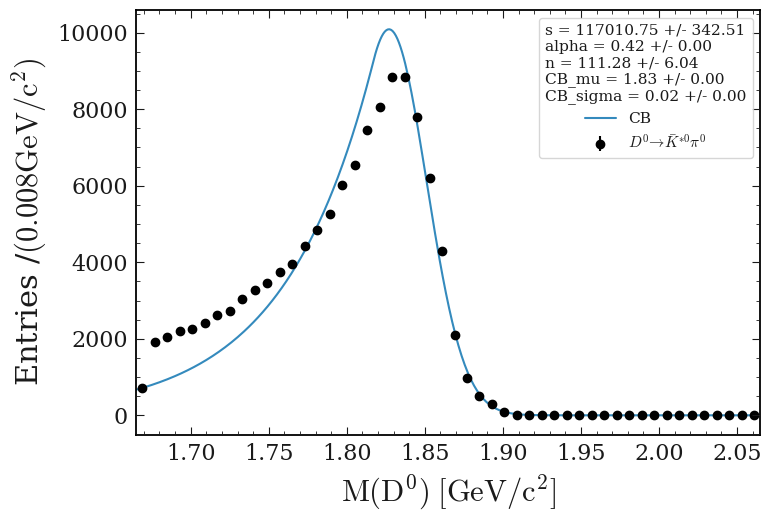

In [595]:
n, xe = np.histogram(dataset, bins=50, range=(1.665,2.065))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


# import b2plot as bp
# plt.style.use('belle2')
xrange = (1.665,2.065,400)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label=r"$D^0 \to \bar{K}^{*0} \pi^0$")

# plt.hist(dataset,density=True)

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

# plt.plot(xm, crystalball_pdf(xm, alpha=1.006, n=9.2, CB_mu=1.86272, CB_sigma=0.01294) * len(dataset) * dx[0],label="fixed(CB)")


# plt.plot(xm, crystalball.pdf(xm, *m.values) * len(dataset) * dx[0],label="fit(CB)")


plt.plot(xm, signal_crystalball(xm, *m.values)[1] * dx[0] ,label="CB")


# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'x-small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='x-small')

ax = plt.gca()
# ax.set_ylim(1e-1,1e5)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
# plt.savefig(this_plot_location)

# plt.yscale("log")

print("true entries = " + str(len(dataset)))
# print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

## Generic MC

In [64]:
signal_variables = ['D0_M','Dstarp_Q','Dstarp_CMS_p','antiKstar_InvM','D0_cosHel_0','Pi0_Prob']

In [65]:
ccbar_name_sig = '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/ccbar/D2antiKstarpi0_ccbar_recon_output_0*.root'

uubar_name_sig = ccbar_name_sig.replace("ccbar", "uubar")

ddbar_name_sig = ccbar_name_sig.replace("ccbar", "ddbar")

ssbar_name_sig = ccbar_name_sig.replace("ccbar", "ssbar")

charged_name_sig = ccbar_name_sig.replace("ccbar", "charged")

mixed_name_sig = ccbar_name_sig.replace("ccbar", "mixed")

In [66]:
# base_filter = 'ref_phi_rank_Dstp==1'
tree='antiKstargamma'
base_filter = 'abs(antiKstar_InvM - 0.89555)<0.06 && abs(Dstarp_Q - 0.00593)<0.0006 && Dstarp_CMS_p>2.4 && Pis_charge==1'

In [67]:
base_ccbar_1abinv_sig = get_data(file=ccbar_name_sig, tree=tree, base_filter=base_filter,variables=signal_variables )

base_uubar_1abinv_sig = get_data(file=uubar_name_sig, tree=tree, base_filter=base_filter,variables=signal_variables )

base_ddbar_1abinv_sig = get_data(file=ddbar_name_sig, tree=tree, base_filter=base_filter,variables=signal_variables )

base_ssbar_1abinv_sig = get_data(file=ssbar_name_sig, tree=tree, base_filter=base_filter,variables=signal_variables )

base_charged_1abinv_sig = get_data(file=charged_name_sig, tree=tree, base_filter=base_filter,variables=signal_variables )

base_mixed_1abinv_sig = get_data(file=mixed_name_sig, tree=tree, base_filter=base_filter,variables=signal_variables )

# base_taupair_1abinv_ctrl = get_data(file=taupair_name_ctrl, tree='kshort', base_filter=base_filter,variables=signal_variables )



In [68]:
cut = "antiKstar_InvM>0"

In [69]:
ccbar_1abinv_sig = base_ccbar_1abinv_sig.query(cut)
uubar_1abinv_sig = base_uubar_1abinv_sig.query(cut)
ddbar_1abinv_sig = base_ddbar_1abinv_sig.query(cut)
ssbar_1abinv_sig = base_ssbar_1abinv_sig.query(cut)
charged_1abinv_sig = base_charged_1abinv_sig.query(cut)
mixed_1abinv_sig = base_mixed_1abinv_sig.query(cut)
# taupair_1abinv_ctrl = base_taupair_1abinv_ctrl.query(cut)

D0_M


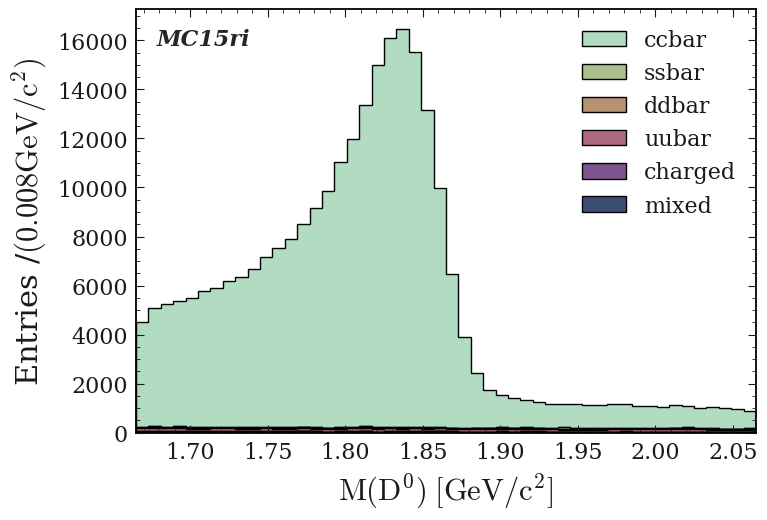

mixed = 1492
charged = 843
uubar = 5158
ddbar = 1394
ccbar = 257112
ssbar = 1800
TOTAL # = 267799


<Figure size 800x550 with 0 Axes>

In [70]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar' ]


colors=b2helix(6)

data_list=dict()
signal_variables = ["D0_M"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar','ccbar']

    print(var)
    mixed_bkg = {var : mixed_1abinv_sig[var] }
    charged_bkg = {var : charged_1abinv_sig[var] }
    ccbar_bkg = {var : ccbar_1abinv_sig[var] }
    uubar_bkg = {var : uubar_1abinv_sig[var] }
    ddbar_bkg = {var : ddbar_1abinv_sig[var] }
    ssbar_bkg = {var : ssbar_1abinv_sig[var] }
#     taupair_bkg = {var : taupair_1abinv_Dtokshortpi0[var] }
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    plt.hist(data_list[var], bins=50, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
        
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()
#     cut = "Dstarp_CMS_p>2.4 and abs(Dstarp_Q - 0.00593) < 0.0006 and abs(kshort_M - 0.49761)<0.009"
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo=r"MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(mixed_1abinv_sig["D0_M"], bins=50, range=(1.665,2.065))

    ax.set_xlim(1.665,2.065)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()
print(f"mixed = {len(mixed_bkg[var])}")
print(f"charged = {len(charged_bkg[var])}")
print(f"uubar = {len(uubar_bkg[var])}")
print(f"ddbar = {len(ddbar_bkg[var])}")
print(f"ccbar = {len(ccbar_bkg[var])}")
print(f"ssbar = {len(ssbar_bkg[var])}")
# print(f"taupair = {len(taupair_bkg[var])}")

print(f"TOTAL # = {len(mixed_bkg[var]) + len(charged_bkg[var]) + len(uubar_bkg[var]) + len(ddbar_bkg[var]) + len(ssbar_bkg[var]) + len(ccbar_bkg[var]) }")


D0_cosHel_0


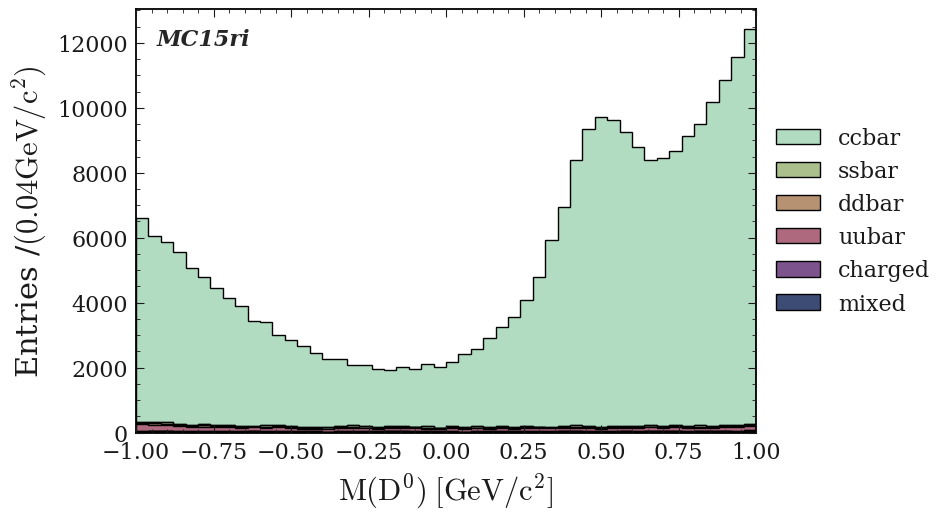

mixed = 1492
charged = 843
uubar = 5158
ddbar = 1394
ccbar = 257112
ssbar = 1800
TOTAL # = 267799


<Figure size 800x550 with 0 Axes>

In [61]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar' ]


colors=b2helix(6)

data_list=dict()
signal_variables = ["D0_cosHel_0"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar','ccbar']

    print(var)
    mixed_bkg = {var : mixed_1abinv_sig[var] }
    charged_bkg = {var : charged_1abinv_sig[var] }
    ccbar_bkg = {var : ccbar_1abinv_sig[var] }
    uubar_bkg = {var : uubar_1abinv_sig[var] }
    ddbar_bkg = {var : ddbar_1abinv_sig[var] }
    ssbar_bkg = {var : ssbar_1abinv_sig[var] }
#     taupair_bkg = {var : taupair_1abinv_Dtokshortpi0[var] }
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    plt.hist(data_list[var], bins=50, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
        
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
#     plt.legend()
#     cut = "Dstarp_CMS_p>2.4 and abs(Dstarp_Q - 0.00593) < 0.0006 and abs(kshort_M - 0.49761)<0.009"
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo=r"MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(mixed_1abinv_ctrl["D0_cosHel_0"], bins=50, range=(-1,1))

    ax.set_xlim(-1,1)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()
print(f"mixed = {len(mixed_bkg[var])}")
print(f"charged = {len(charged_bkg[var])}")
print(f"uubar = {len(uubar_bkg[var])}")
print(f"ddbar = {len(ddbar_bkg[var])}")
print(f"ccbar = {len(ccbar_bkg[var])}")
print(f"ssbar = {len(ssbar_bkg[var])}")
# print(f"taupair = {len(taupair_bkg[var])}")

print(f"TOTAL # = {len(mixed_bkg[var]) + len(charged_bkg[var]) + len(uubar_bkg[var]) + len(ddbar_bkg[var]) + len(ssbar_bkg[var]) + len(ccbar_bkg[var]) }")


In [91]:
# cut = "Pi0_Prob<0.9 & abs(D0_cosHel_0)<0.6"
cut = "Pi0_Prob<0.8"

In [92]:
ccbar_1abinv_sig = base_ccbar_1abinv_sig.query(cut)
uubar_1abinv_sig = base_uubar_1abinv_sig.query(cut)
ddbar_1abinv_sig = base_ddbar_1abinv_sig.query(cut)
ssbar_1abinv_sig = base_ssbar_1abinv_sig.query(cut)
charged_1abinv_sig = base_charged_1abinv_sig.query(cut)
mixed_1abinv_sig = base_mixed_1abinv_sig.query(cut)
# taupair_1abinv_ctrl = base_taupair_1abinv_ctrl.query(cut)

D0_M


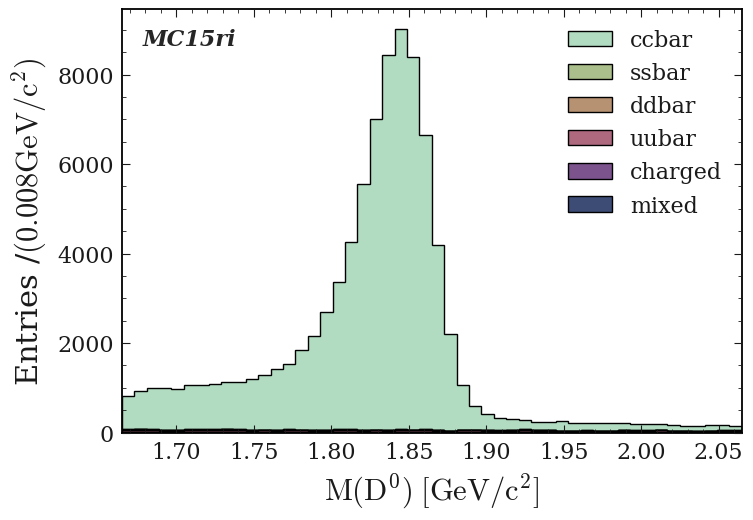

mixed = 440
charged = 242
uubar = 1529
ddbar = 407
ccbar = 84714
ssbar = 382
TOTAL # = 87714


<Figure size 800x550 with 0 Axes>

In [93]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar' ]


colors=b2helix(6)

data_list=dict()
signal_variables = ["D0_M"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar','ccbar']

    print(var)
    mixed_bkg = {var : mixed_1abinv_sig[var] }
    charged_bkg = {var : charged_1abinv_sig[var] }
    ccbar_bkg = {var : ccbar_1abinv_sig[var] }
    uubar_bkg = {var : uubar_1abinv_sig[var] }
    ddbar_bkg = {var : ddbar_1abinv_sig[var] }
    ssbar_bkg = {var : ssbar_1abinv_sig[var] }
#     taupair_bkg = {var : taupair_1abinv_Dtokshortpi0[var] }
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    plt.hist(data_list[var], bins=50, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
        
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()
#     cut = "Dstarp_CMS_p>2.4 and abs(Dstarp_Q - 0.00593) < 0.0006 and abs(kshort_M - 0.49761)<0.009"
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo=r"MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(mixed_1abinv_sig["D0_M"], bins=50, range=(1.665,2.065))

    ax.set_xlim(1.665,2.065)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()
print(f"mixed = {len(mixed_bkg[var])}")
print(f"charged = {len(charged_bkg[var])}")
print(f"uubar = {len(uubar_bkg[var])}")
print(f"ddbar = {len(ddbar_bkg[var])}")
print(f"ccbar = {len(ccbar_bkg[var])}")
print(f"ssbar = {len(ssbar_bkg[var])}")
# print(f"taupair = {len(taupair_bkg[var])}")

print(f"TOTAL # = {len(mixed_bkg[var]) + len(charged_bkg[var]) + len(uubar_bkg[var]) + len(ddbar_bkg[var]) + len(ssbar_bkg[var]) + len(ccbar_bkg[var]) }")


D0_cosHel_0


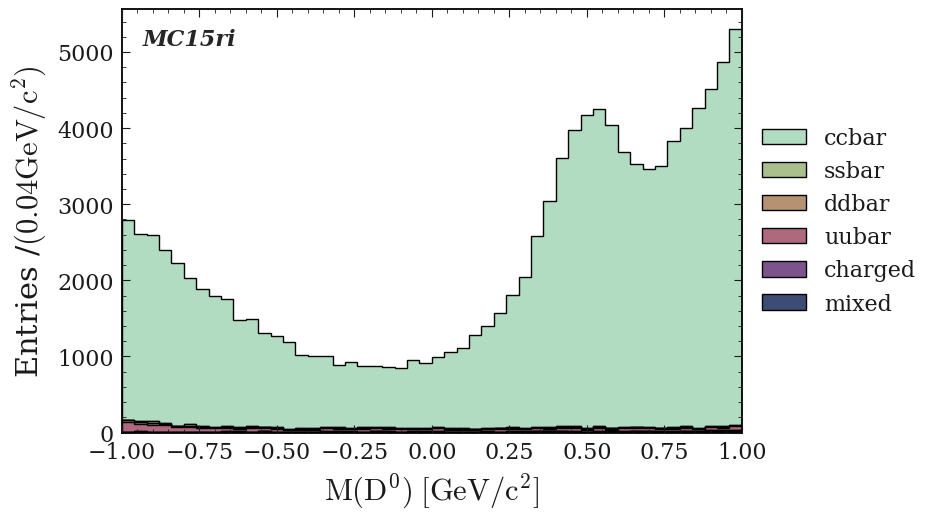

mixed = 579
charged = 296
uubar = 1949
ddbar = 511
ccbar = 111087
ssbar = 521
TOTAL # = 114943


<Figure size 800x550 with 0 Axes>

In [76]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar' ]


colors=b2helix(6)

data_list=dict()
signal_variables = ["D0_cosHel_0"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar','ccbar']

    print(var)
    mixed_bkg = {var : mixed_1abinv_sig[var] }
    charged_bkg = {var : charged_1abinv_sig[var] }
    ccbar_bkg = {var : ccbar_1abinv_sig[var] }
    uubar_bkg = {var : uubar_1abinv_sig[var] }
    ddbar_bkg = {var : ddbar_1abinv_sig[var] }
    ssbar_bkg = {var : ssbar_1abinv_sig[var] }
#     taupair_bkg = {var : taupair_1abinv_Dtokshortpi0[var] }
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    plt.hist(data_list[var], bins=50, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
        
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
#     plt.legend()
#     cut = "Dstarp_CMS_p>2.4 and abs(Dstarp_Q - 0.00593) < 0.0006 and abs(kshort_M - 0.49761)<0.009"
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo=r"MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(mixed_1abinv_ctrl["D0_cosHel_0"], bins=50, range=(-1,1))

    ax.set_xlim(-1,1)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()
print(f"mixed = {len(mixed_bkg[var])}")
print(f"charged = {len(charged_bkg[var])}")
print(f"uubar = {len(uubar_bkg[var])}")
print(f"ddbar = {len(ddbar_bkg[var])}")
print(f"ccbar = {len(ccbar_bkg[var])}")
print(f"ssbar = {len(ssbar_bkg[var])}")
# print(f"taupair = {len(taupair_bkg[var])}")

print(f"TOTAL # = {len(mixed_bkg[var]) + len(charged_bkg[var]) + len(uubar_bkg[var]) + len(ddbar_bkg[var]) + len(ssbar_bkg[var]) + len(ccbar_bkg[var]) }")
